<a href="https://colab.research.google.com/github/dynasty-29/Movie-Industry-Analysis/blob/main/Movie_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction
### Business Understanding

As of 2018, 54 percent of U.S.-based respondents stated that their favorite movie watching location was at home. Only around 13 percent of respondents stated that they preferred to watch movies in a theater, while 22 percent stated that they like the theater and home options equally.
Movies have long been a staple of the entertainment industry in both the United States and across the globe both for streaming services and movie theaters. According to statista, Netflix generated total revenue of nearly 7.7 billion U.S. dollars, up from about 6.64 billion in the corresponding quarter of 2020. Meaning that more and more people are turning to streaming services.



This data named Movie Industry and was acquired from kaggle and can be acquired here [here]

It has 10 columns and 7668 rows in the dataset.
Column names and definition:

1. budget: the budget of a movie. 

2. company: the production company

3. country: country of origin

4. director: the director

5. genre: main genre of the movie.

6. gross: revenue of the movie

7. name: name of the movie

8. rating: rating of the movie (R, PG, etc.)

9. released: release date (YYYY-MM-DD)

10. runtime: duration of the movie

11. score: IMDb user rating

12. votes: number of user 

13. star: main actor/actress

14. writer: writer of the movie

15. year: year of release



# 0.0 Importing required libraries

In [ ]:
import pandas              as pd
import numpy               as np
import seaborn             as sns
import matplotlib.pyplot   as plt

# A grid layout to place subplots within a figure.
import matplotlib.gridspec as gridspec


In [ ]:
def settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [ ]:
settings()

Populating the interactive namespace from numpy and matplotlib


## 0.1 Loading Data

In [ ]:
# read the csv file

df = pd.read_csv('movies.csv')

In [ ]:
#sample rows of the df


df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


# 1.0 STEP 01 - DESCRIPTION OF DATA

In [ ]:
df.columns

# It's not necessary to change the name or the format of the column names.

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [ ]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## 1.1 Data Dimensions

In [ ]:
df.shape


(7668, 15)

## 1.2 Data Types

In [ ]:
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## 1.3 Check Null Values

In [ ]:

## no of missing values in columns

df.isna().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
#percentage of missing values in columns

pd.DataFrame({'Missing values (%)': df.isnull().sum()/len(df.index)*100})

,Missing values (%)
name,0.000000
rating,1.004173
genre,0.000000
year,0.000000
released,0.026082
score,0.039124
votes,0.039124
director,0.000000
writer,0.039124
star,0.013041


In [ ]:
# Filter out Null values in the budget column

df = df[df['budget'].notna()]
print(df.isnull().sum())

name         0
rating      20
genre        0
year         0
released     0
score        3
votes        3
director     0
writer       0
star         1
country      1
budget       0
gross       61
company      6
runtime      2
dtype: int64


In [ ]:
# Filter out Null values in the gross column

df = df[df['gross'].notna()]

In [ ]:
# Fill in missing value with word missing in the rating column

df['rating'] = df['rating'].fillna('Missing')# Fill in missing value with word missing in the rating column

df['rating'] = df['rating'].fillna('Missing')


In [ ]:
# Fill in missing value with word missing in the country column
df['country'] = df['country'].fillna('Missing')

In [ ]:
# Fill in missing value with word missing in the company column
df['company'] = df['company'].fillna('Missing')

In [ ]:
# Check for duplicates
duplicate = df[df.duplicated()]
duplicate

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


### 1.4 Check for Duplicates


In [ ]:
# Change data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

### 1.5 Validity

In [ ]:
#check for space in between columns
print(df['name'].str.isspace().sum())
print(df['rating'].str.isspace().sum())
print(df['genre'].str.isspace().sum())
print(df['director'].str.isspace().sum())
print(df['writer'].str.isspace().sum())
print(df['star'].str.isspace().sum())
print(df['country'].str.isspace().sum())
print(df['company'].str.isspace().sum())
print(df.columns.str.isspace().sum())

0
0
0
0
0
0
0
0
0


## 1.6 Descriptive Statistical

In [ ]:
# Separate numerical attributes from categorical attributes

num_attributes = df.select_dtypes( include=['int64', "float"] )

In [ ]:
num_attributes.sample()

,year,score,votes,budget,gross,runtime
851,1986,6.8,76000.0,9000000,40479480,97.0


### 1.6.1 Numerical Attributes

In [ ]:

#  mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T


# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std'])

In [ ]:
m

,attributes,min,max,range,mean,median,std
0,year,1980.0,2.020000e+03,4.000000e+01,2.001652e+03,2002.0,1.054082e+01
1,score,1.9,9.300000e+00,7.400000e+00,6.392642e+00,6.5,9.631115e-01
2,votes,195.0,2.400000e+06,2.399805e+06,1.149110e+05,52000.0,1.842085e+05
3,budget,6000.0,3.560000e+08,3.559940e+08,3.593864e+07,21000000.0,4.154388e+07
4,gross,309.0,2.847246e+09,2.847246e+09,1.030045e+08,36711988.0,1.870879e+08
5,runtime,63.0,2.710000e+02,2.080000e+02,1.081564e+02,NaN,1.811973e+01


In [ ]:
df["gross"].max()

2847246203

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '"gross revenue range (0 - 2,847,246,203 )')]

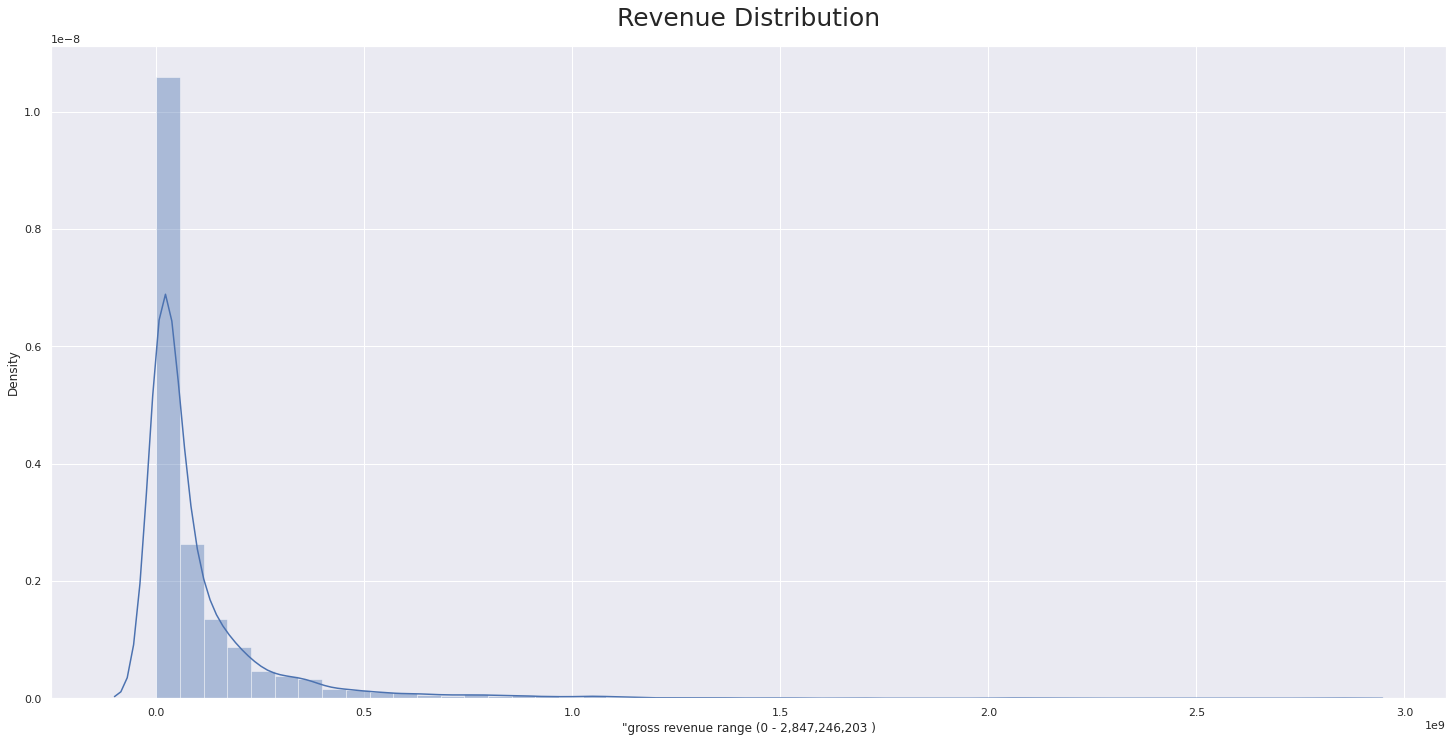

In [ ]:

# Notice the skeweness of the gross revenue to the left

ax = sns.distplot( df['gross'] )
plt.title("Revenue Distribution", fontsize=25, pad=20)
ax.set(xlabel='"gross revenue range (0 - 2,847,246,203 )' )

Text(0.5, 1, 'Distribution Across all Numerical Attributes')

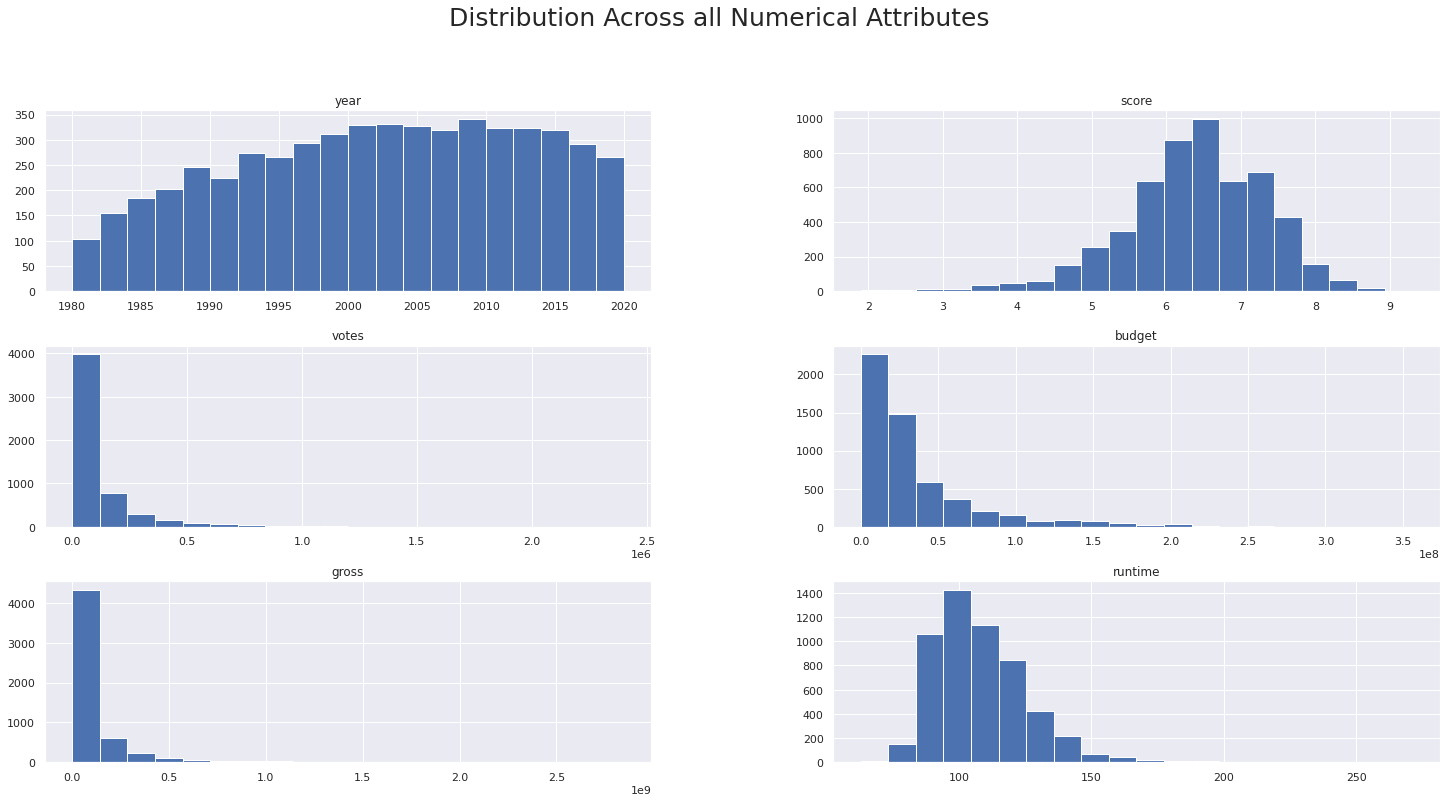

In [ ]:
# histograms distributed to all of our numerical attributes

num_attributes.hist( bins=20)
plt.suptitle( 'Distribution Across all Numerical Attributes', fontsize= 25, y=1)


### 1.6.2 Categorical Attributes


In [ ]:
# Separate numerical attributes from categorical attributes
cat_attributes = df.select_dtypes( exclude=['float64', 'int64'] )

In [ ]:
cat_attributes.shape

(5436, 9)

In [ ]:
df.sample(1)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
580,Irreconcilable Differences,PG,Comedy,1984,"September 28, 1984 (United States)",5.8,2900.0,Charles Shyer,Nancy Meyers,Ryan O'Neal,United States,6000000,12414210,Hemdale,113.0


Text(0.5, 1, 'Outliers in Genres')

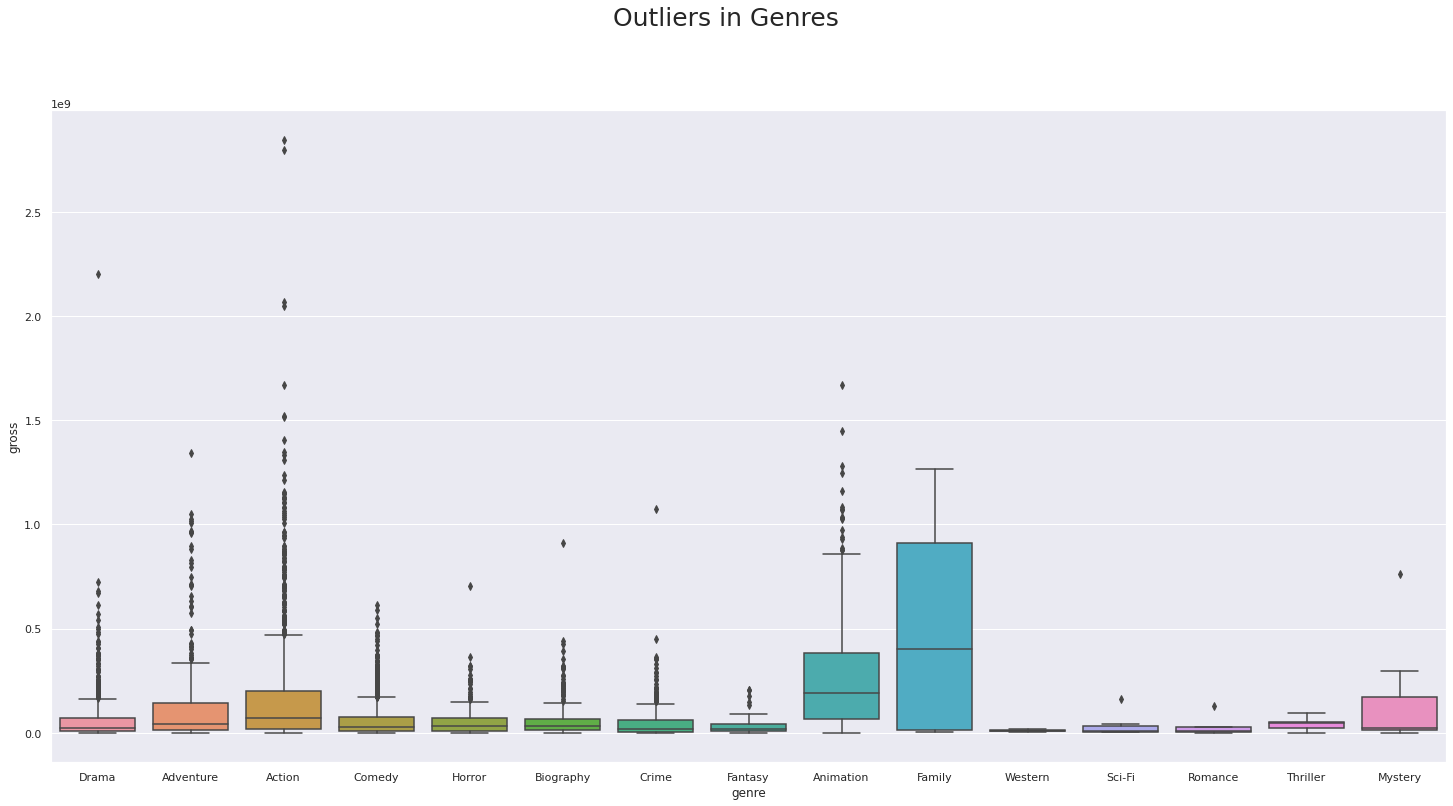

In [ ]:
#Checking for outliers in our dataset .Action has the most outliers


sns.boxplot( x= 'genre', y='gross' , data=df) 
plt.suptitle('Outliers in Genres',fontsize=25, y=1)


#### Outliers in Genres
Action genre has the most outliers

Western Genre has the least outliers

Our data is mostly skewed to the right

In [ ]:
cat_attributes.columns


Index(['name', 'rating', 'genre', 'released', 'director', 'writer', 'star',
       'country', 'company'],
      dtype='object')

Text(0.5, 1, 'Outliers in Rating')

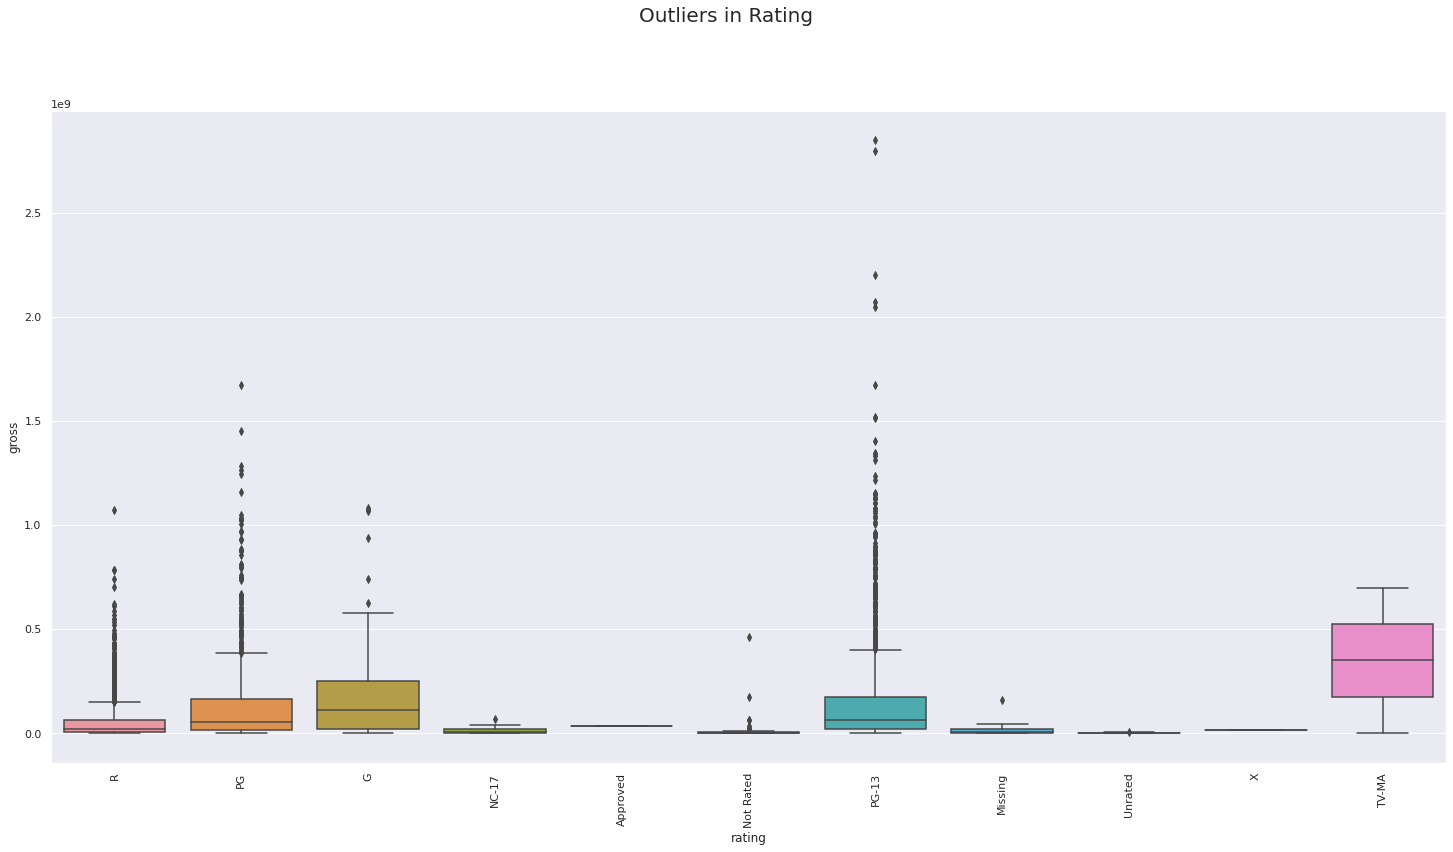

In [ ]:
# boxplot plotting Ratings accross our dataset, check for outliers
aux1 = df[ df['gross'] > 0]

sns.boxplot( x= 'rating', y='gross' , data=aux1 )
plt.xticks(rotation=90)
plt.suptitle('Outliers in Rating',fontsize=20, y=1)




Text(0.5, 1, 'Outliers in Country')

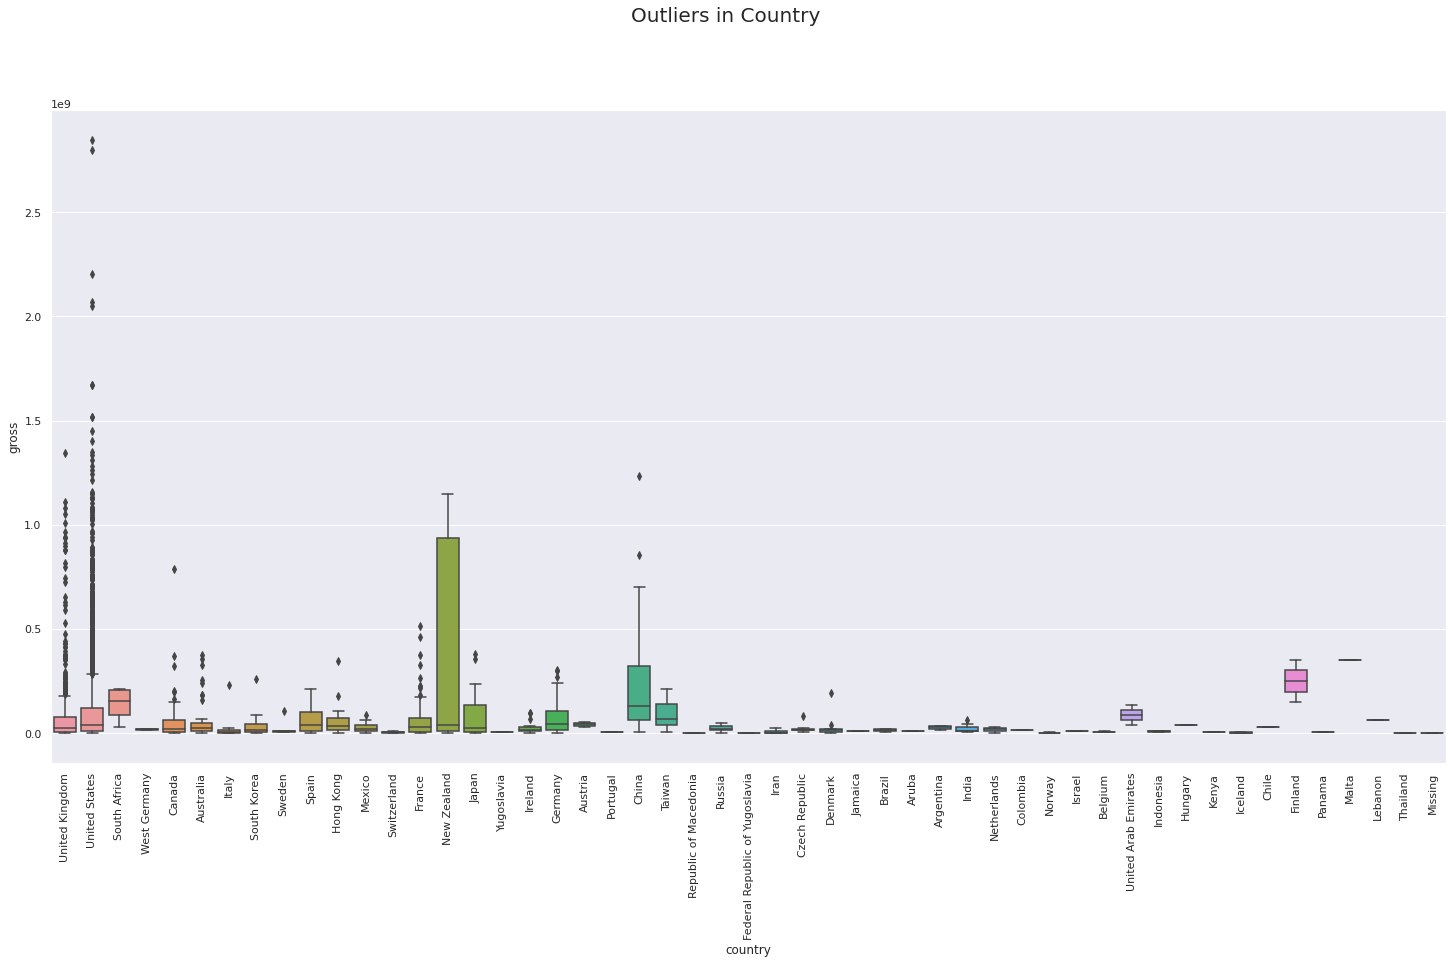

In [ ]:
#boxplot to get the generally understanding of our categorical variables

sns.boxplot( x= 'country', y='gross' , data=aux1 )
plt.xticks(rotation=90)
plt.suptitle('Outliers in Country',fontsize=20, y=1)

The US had the highest amount of outliers followed by the UK

## 2.1 Univariate Analysis


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 20.200000000000003, '"gross revenue range (0 - 2,847,246,203 )')]

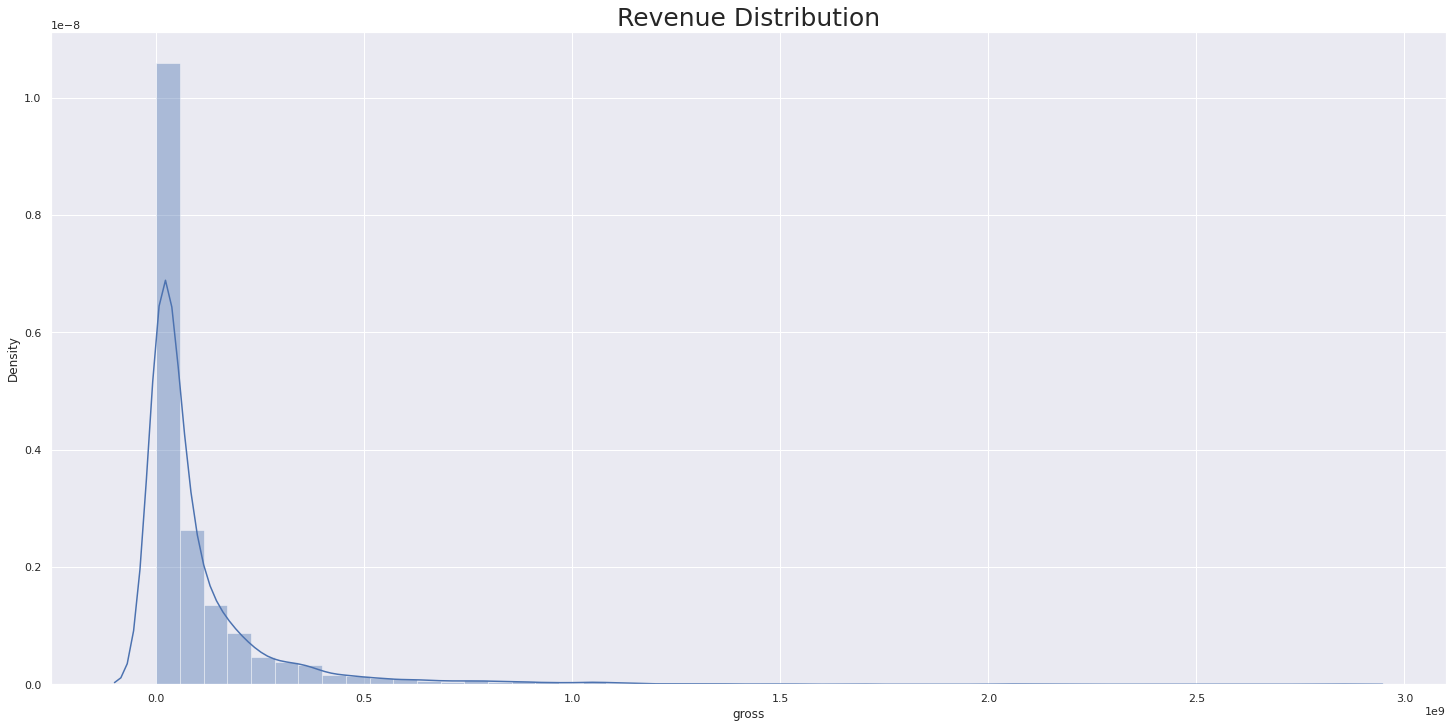

In [ ]:
#gross revenue distribution of  our dataset, highly skewedd to the left

sns.distplot(df["gross"])
plt.title('Revenue Distribution',fontsize=25, y=1)
ax.set(xlabel='"gross revenue range (0 - 2,847,246,203 )' )

In [ ]:
df['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Animation', 'Family', 'Western', 'Sci-Fi',
       'Romance', 'Thriller', 'Mystery'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an expli

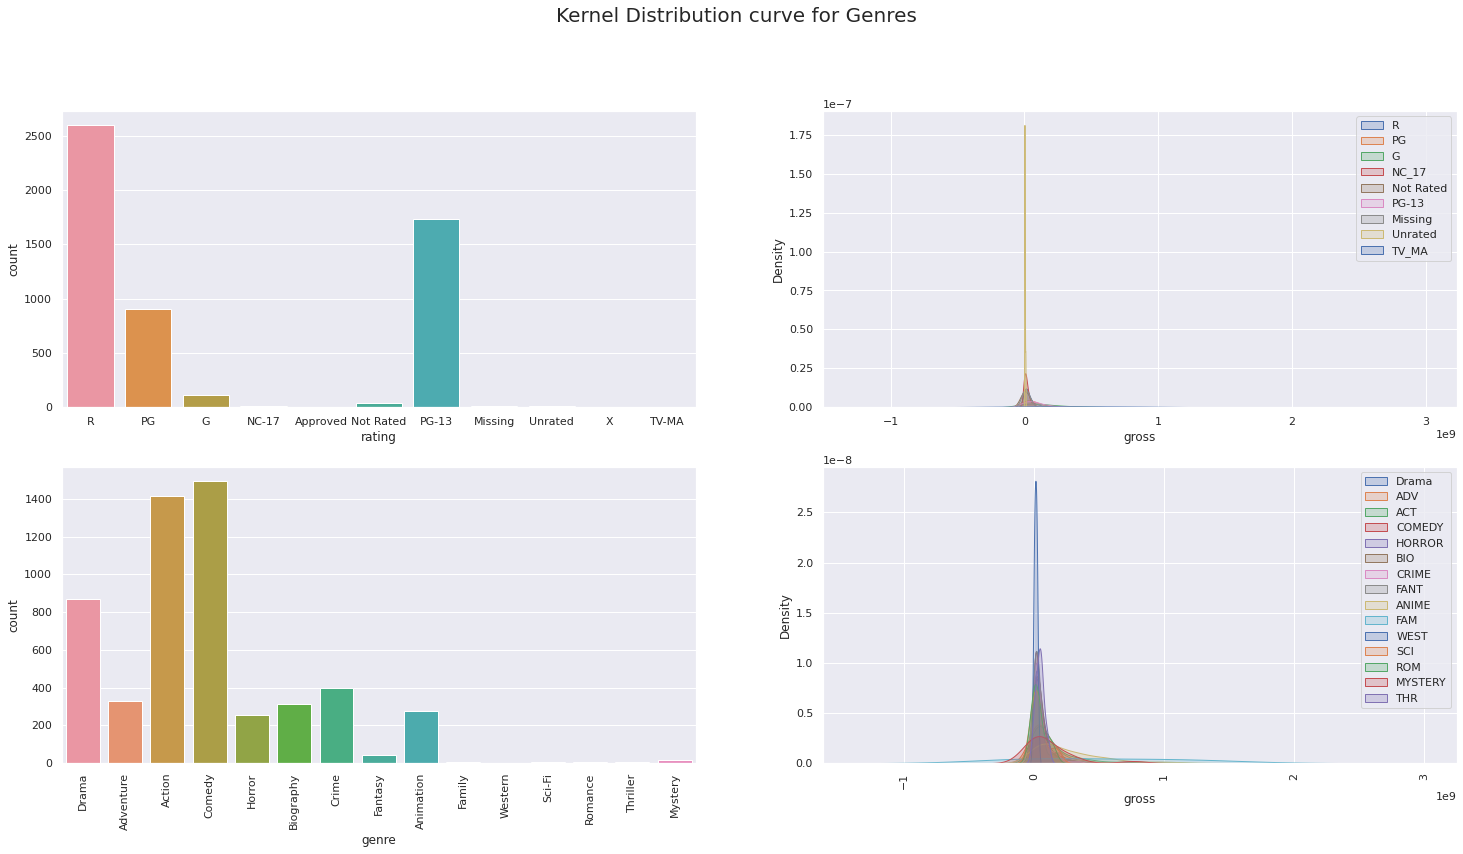

In [ ]:

plt.subplot( 2, 2, 1)
sns.countplot( df['rating'] )

plt.subplot( 2, 2, 2)
sns.kdeplot( df[df['rating'] == 'R']['gross'], label='R', shade=True )
sns.kdeplot( df[df['rating'] == 'PG']['gross'], label='PG', shade=True )
sns.kdeplot( df[df['rating'] == 'G']['gross'], label='G', shade=True )
sns.kdeplot( df[df['rating'] == 'NC-17']['gross'], label='NC_17', shade=True )
sns.kdeplot( df[df['rating'] == 'Approved']['gross'], label='Approved', shade=True )
sns.kdeplot( df[df['rating'] == 'Not Rated']['gross'], label='Not Rated', shade=True )
sns.kdeplot( df[df['rating'] == 'PG-13']['gross'], label='PG-13', shade=True )
sns.kdeplot( df[df['rating'] == 'Missing']['gross'], label='Missing', shade=True )
sns.kdeplot( df[df['rating'] == 'Unrated']['gross'], label='Unrated', shade=True )
sns.kdeplot( df[df['rating'] == 'X']['gross'], label='X', shade=True )
sns.kdeplot( df[df['rating'] == 'TV-MA']['gross'], label='TV_MA', shade=True )
plt.suptitle('Kernel Distribution curve for Ratings',fontsize=20, y=1)
plt.legend()

plt.subplot( 2, 2, 3)
sns.countplot( df['genre'] )
plt.xticks(rotation=90)


plt.subplot( 2, 2, 4)

sns.kdeplot( df[df['genre'] == 'Drama']['gross'], label='Drama', shade=True )
sns.kdeplot( df[df['genre'] == 'Adventure']['gross'], label='ADV', shade=True )
sns.kdeplot( df[df['genre'] == 'Action']['gross'], label='ACT', shade=True )
sns.kdeplot( df[df['genre'] == 'Comedy']['gross'], label='COMEDY', shade=True )
sns.kdeplot( df[df['genre'] == 'Horror']['gross'], label='HORROR', shade=True )
sns.kdeplot( df[df['genre'] == 'Biography']['gross'], label='BIO', shade=True )
sns.kdeplot( df[df['genre'] == 'Crime']['gross'], label='CRIME', shade=True )
sns.kdeplot( df[df['genre'] == 'Fantasy']['gross'], label='FANT', shade=True )
sns.kdeplot( df[df['genre'] == 'Animation']['gross'], label='ANIME', shade=True )
sns.kdeplot( df[df['genre'] == 'Family']['gross'], label='FAM', shade=True )
sns.kdeplot( df[df['genre'] == 'Western']['gross'], label='WEST', shade=True )
sns.kdeplot( df[df['genre'] == 'Sci-Fi']['gross'], label='SCI', shade=True )
sns.kdeplot( df[df['genre'] == 'Romance']['gross'], label='ROM', shade=True )
sns.kdeplot( df[df['genre'] == 'Mystery']['gross'], label='MYSTERY', shade=True )
sns.kdeplot( df[df['genre'] == 'Thriller']['gross'], label='THR', shade=True )
plt.xticks(rotation=90)
plt.suptitle('Kernel Distribution curve for Genres',fontsize=20, y=1)

plt.legend()

## 2.2 Bivariate Analysis


## **Q1. Analyzing the revenue of the movie industry over the years**






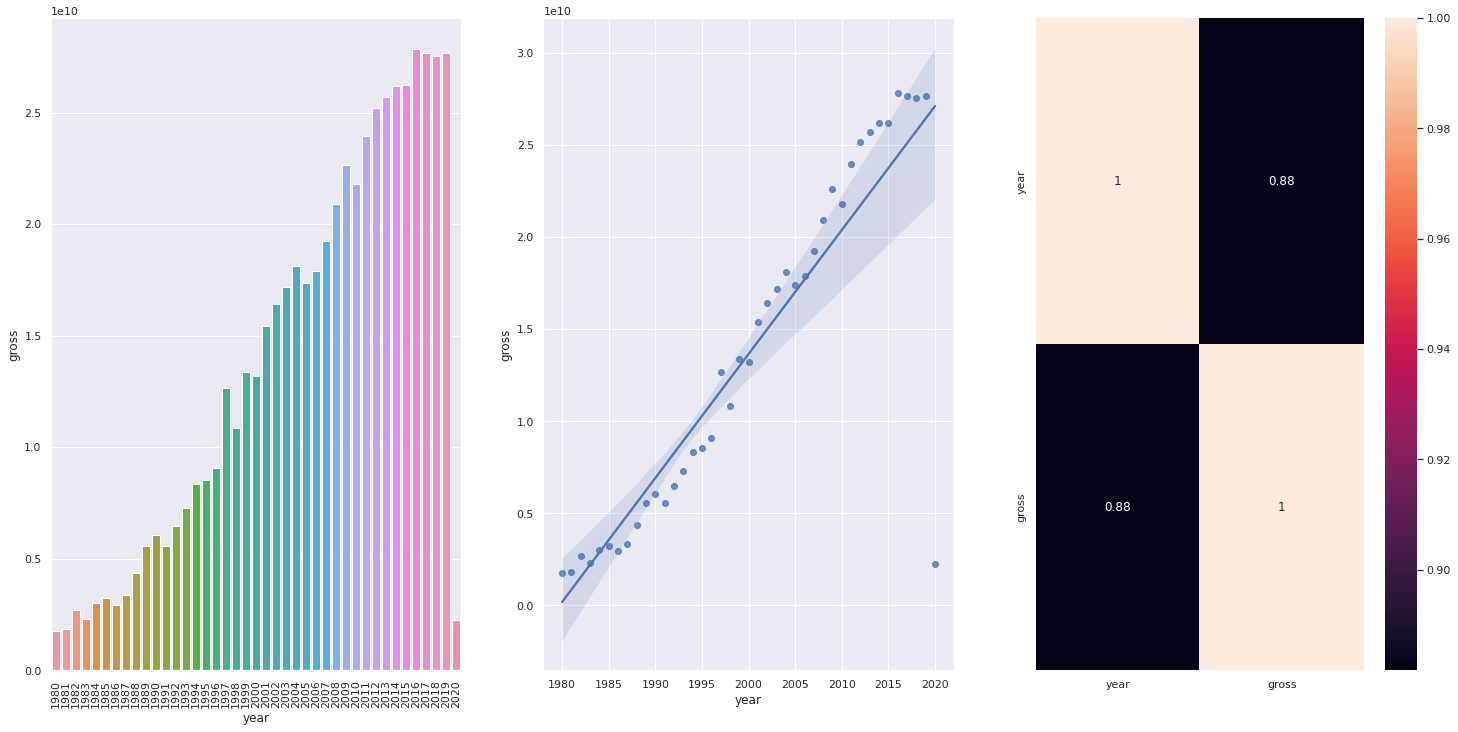

In [ ]:
plt.subplot(1,3,1)
aux1 = df[['year', 'gross']].groupby( 'year' ).sum().reset_index()
sns.barplot( x='year', y='gross', data=aux1)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.regplot( x='year', y='gross', data=aux1 )

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True )

 The amount of gross revenue increases over time, strong positive correlation between gross revenue and years

## Q2  Analyzing the profit to revenue analysis of the movie industry over the years


In [ ]:
#Start by adding profit ratio column
df["profit_ratio"] = df["gross"]/df["budget"]

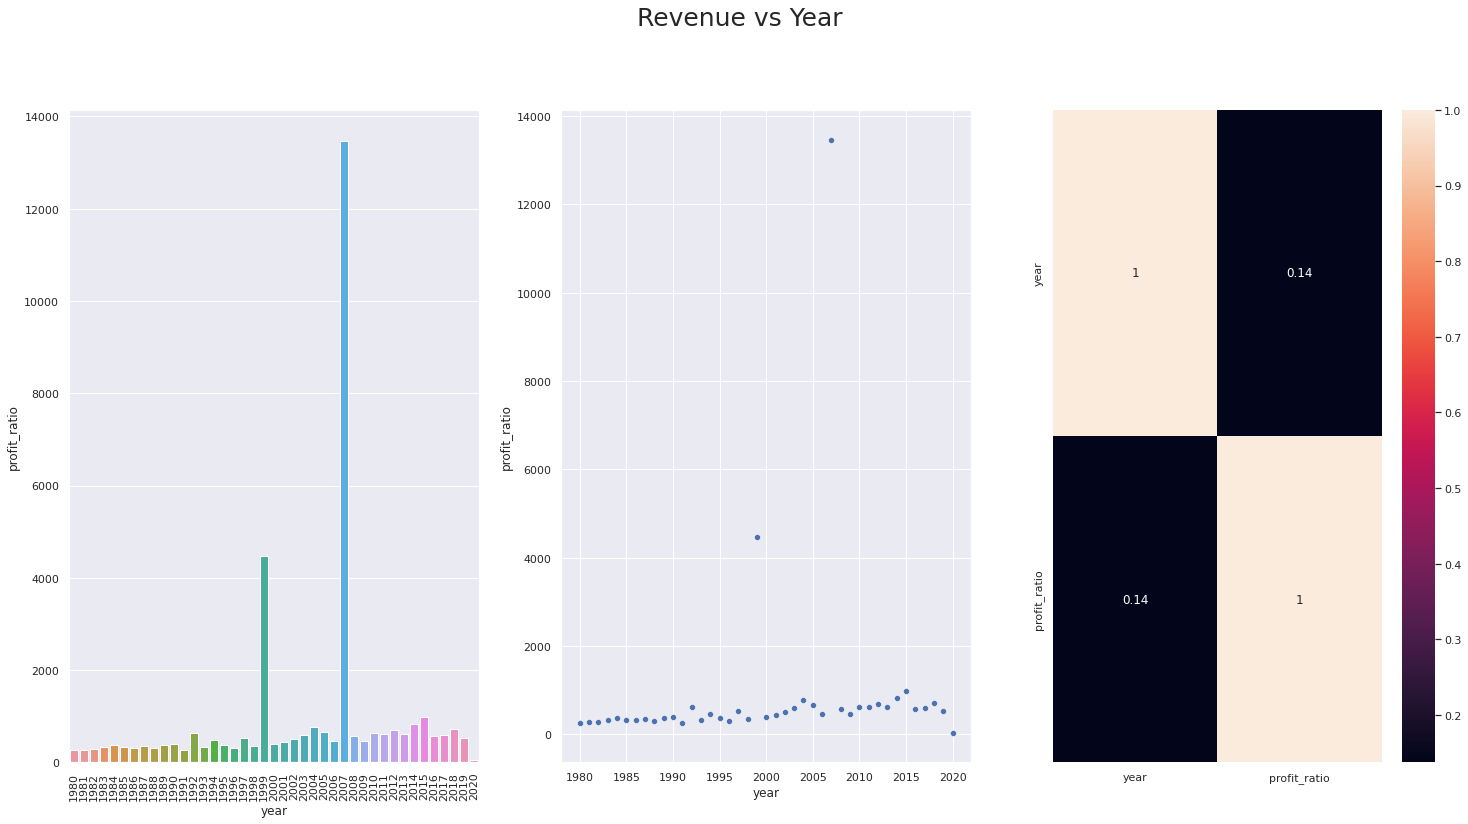

In [ ]:
# the amount of revenue films have accrued has gained over time


year_gross = df.groupby(['year'])['profit_ratio'].agg(profit_ratio='sum').reset_index()
year_gross.sort_values(by=['profit_ratio'], ascending=False, inplace=True, ignore_index=True)


plt.subplot(1,3,1)
ax2 = sns.barplot( x='year', y='profit_ratio', data=year_gross)
plt.xticks(rotation=90)
plt.suptitle('Revenue vs Year ',fontsize=25, y=1)


plt.subplot(1,3,2)
sns.scatterplot( x='year', y='profit_ratio', data=year_gross )

plt.subplot(1,3,3)
sns.heatmap( year_gross.corr( method='pearson' ), annot=True )



The years 2007 and 1999 were the most profitable

### Q2  ** Analyzing the genres that make the most money **


Text(0.5, 1, 'Genre vs Profit ratio ')

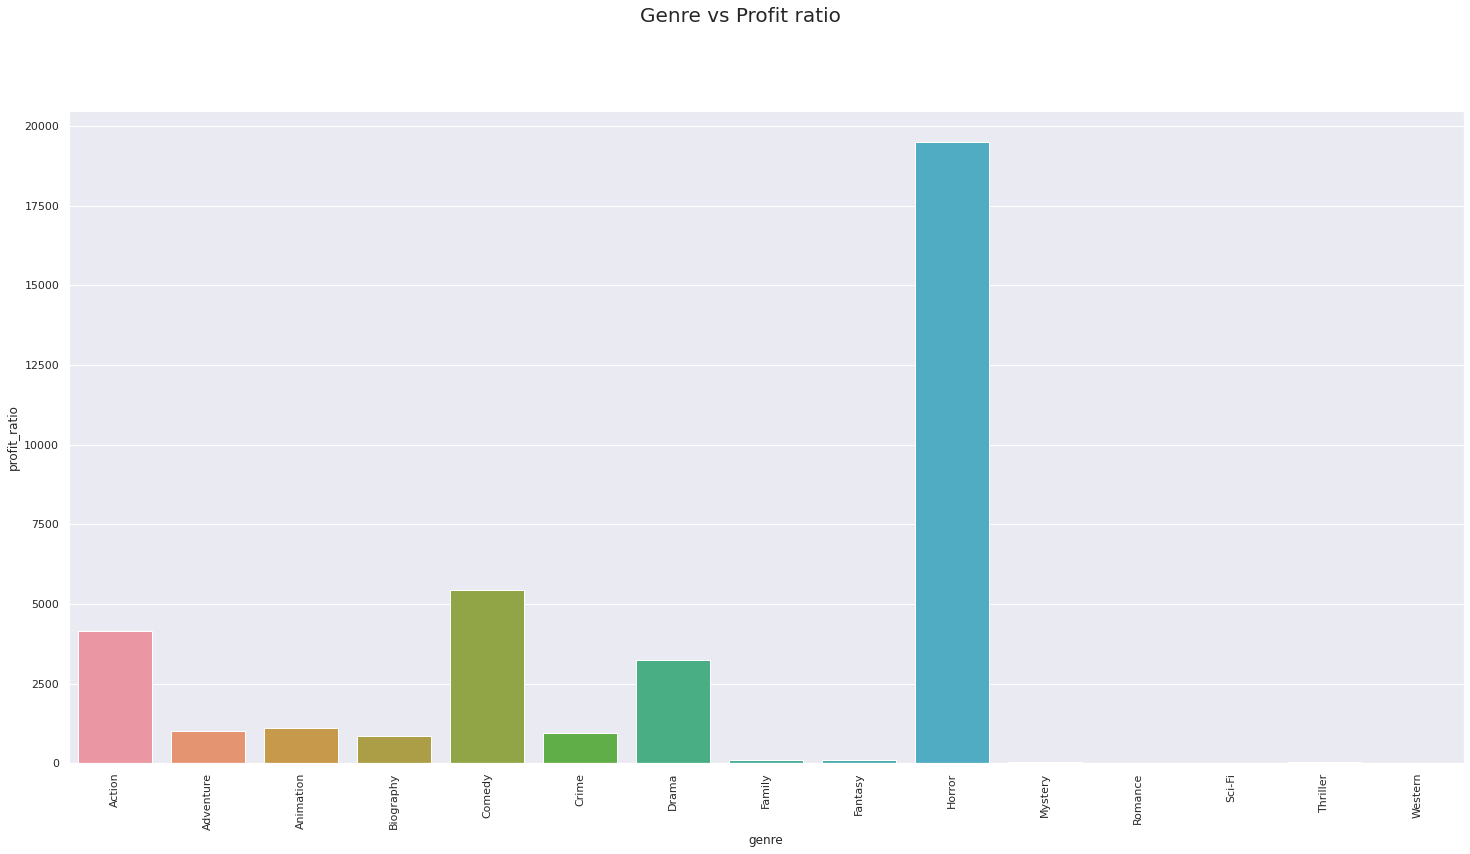

In [ ]:
#We start with a view of genre in respect to the profit ratio
aux3 = df[["year","genre", 'profit_ratio']].groupby( 'genre' ).sum().reset_index()
plt.subplot( 1, 1, 1 )
sns.barplot( x='genre', y='profit_ratio', data=aux3 )
plt.xticks(rotation=90)
plt.suptitle('Genre vs Profit ratio ',fontsize=20, y=1)

Horror Films made the most money since they are the most profitable



Its important to note that there was a specific movie in Horror genre that made a billion dollar profit from just 15000 dollar investment giving us a highly skewed results.

Text(0.5, 1, 'Genre vs revenue ')

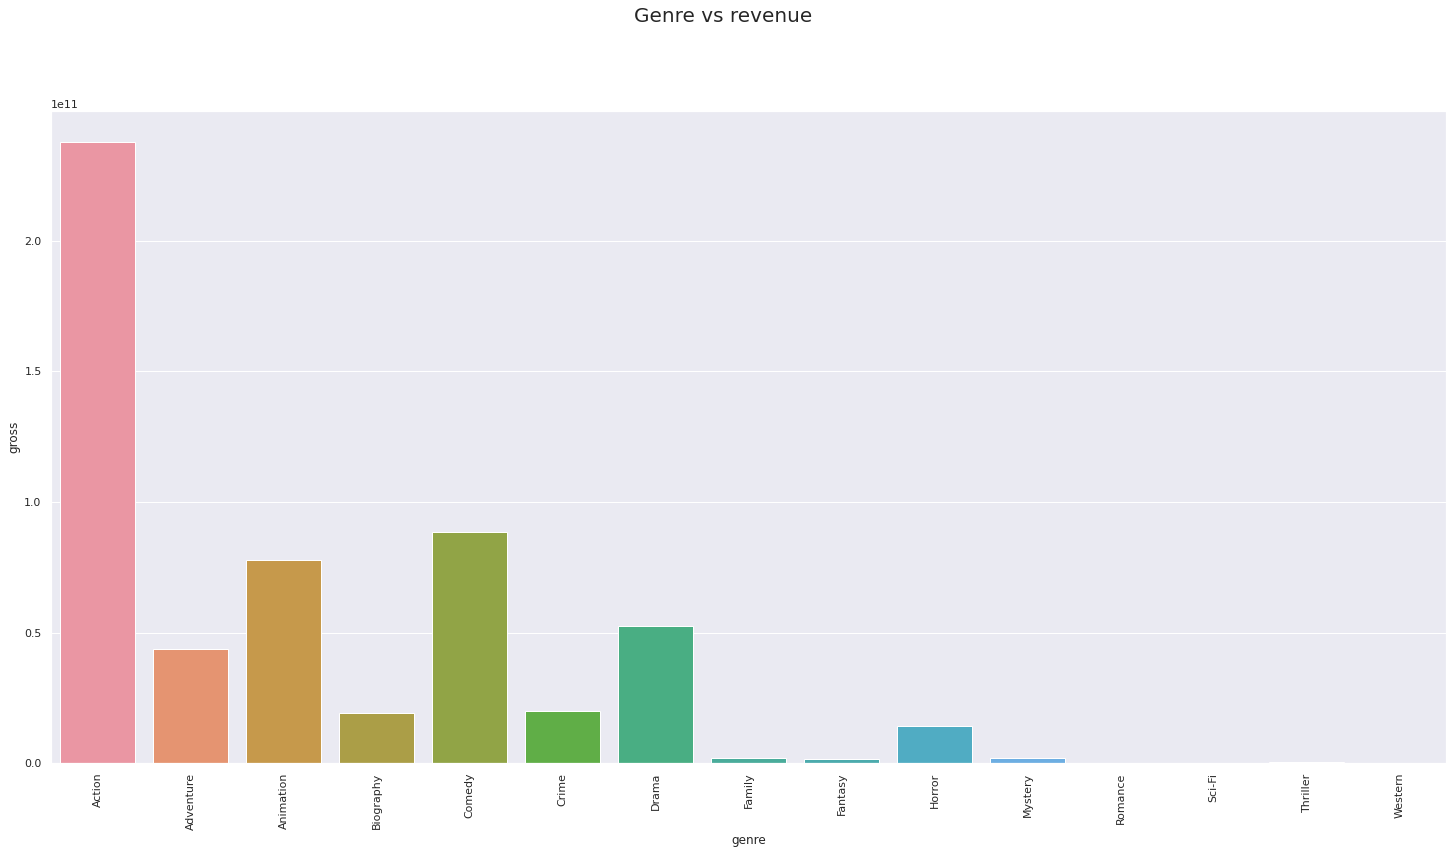

In [ ]:
# We also look and the revenue rather than profit only due to the outlier explained above
aux3 = df[["year","genre", 'gross']].groupby( 'genre' ).sum().reset_index()
plt.subplot( 1, 1, 1 )
sns.barplot( x='genre', y='gross', data=aux3 )
plt.xticks(rotation=90)
plt.suptitle('Genre vs revenue ',fontsize=20, y=1)

From this we see that action genre generally made highest revenue across the board without narrowing down on profit alone

## **Q3. Determining which company has the best movie investments **

Text(0.5, 1, 'Revenue vs Production Company ')

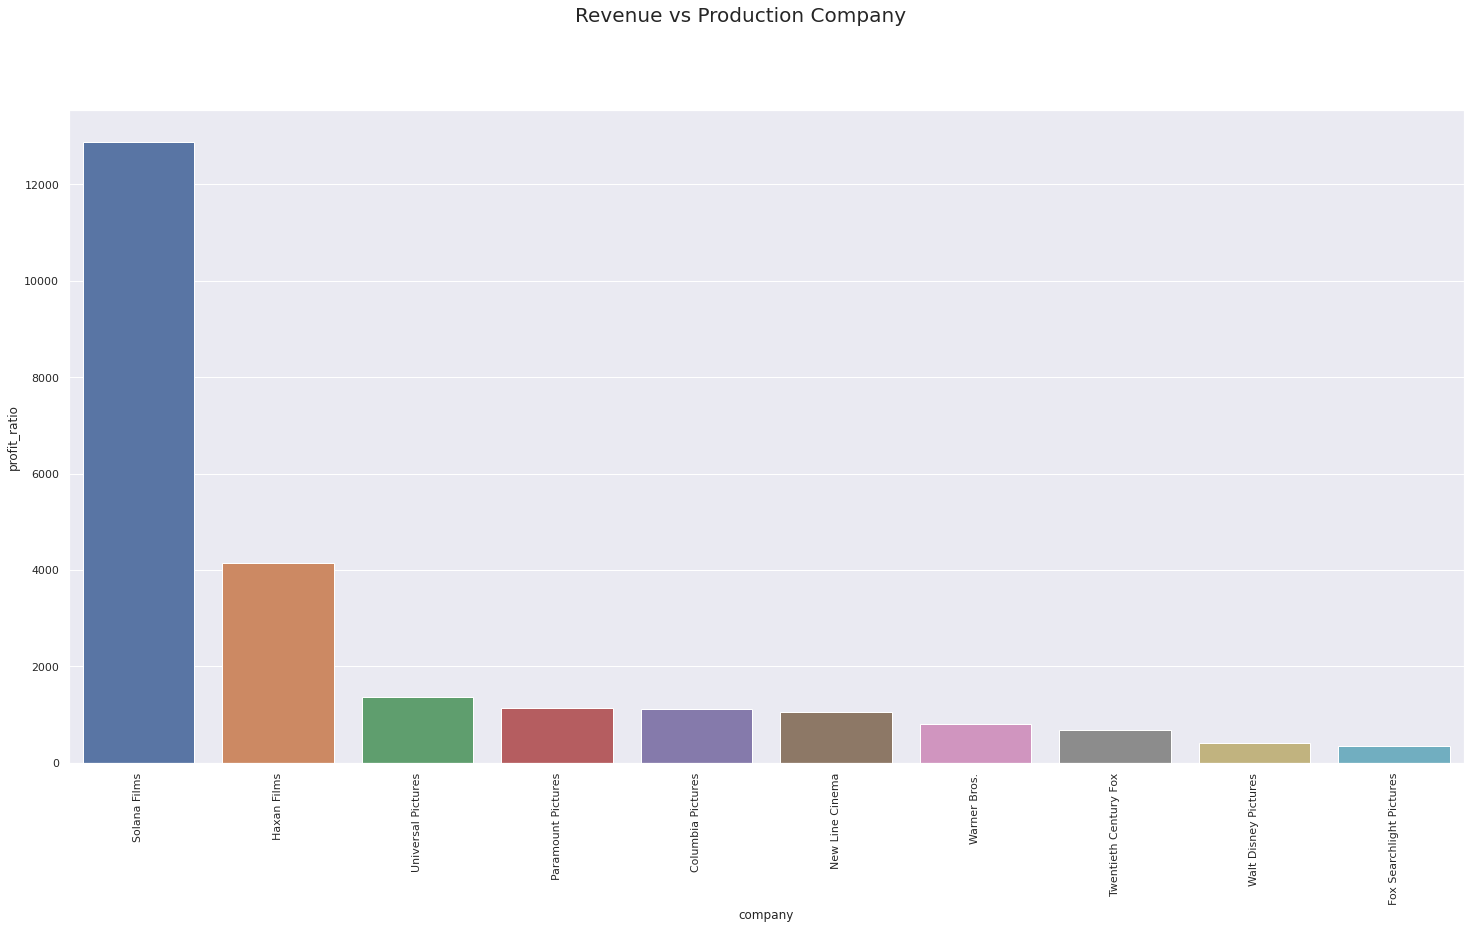

In [ ]:
#we then move on to comparing company versus investment
company_inv_num = 10

company_gross = df.groupby('company')['profit_ratio'].agg(profit_ratio='sum').reset_index()
company_gross.sort_values(by=['profit_ratio'], ascending=False, inplace=True, ignore_index=True)

company_gross = company_gross.iloc[:company_inv_num]
company_gross

ax5 = sns.barplot( x='company', y='profit_ratio', data=company_gross)
plt.xticks(rotation=90)
plt.suptitle('Revenue vs Production Company ',fontsize=20, y=1)



Solana films has the best movie investment being the company producing.  Horror movies which as seen above had a great return on investment

Text(0.5, 1, 'Revenue vs Production Company ')

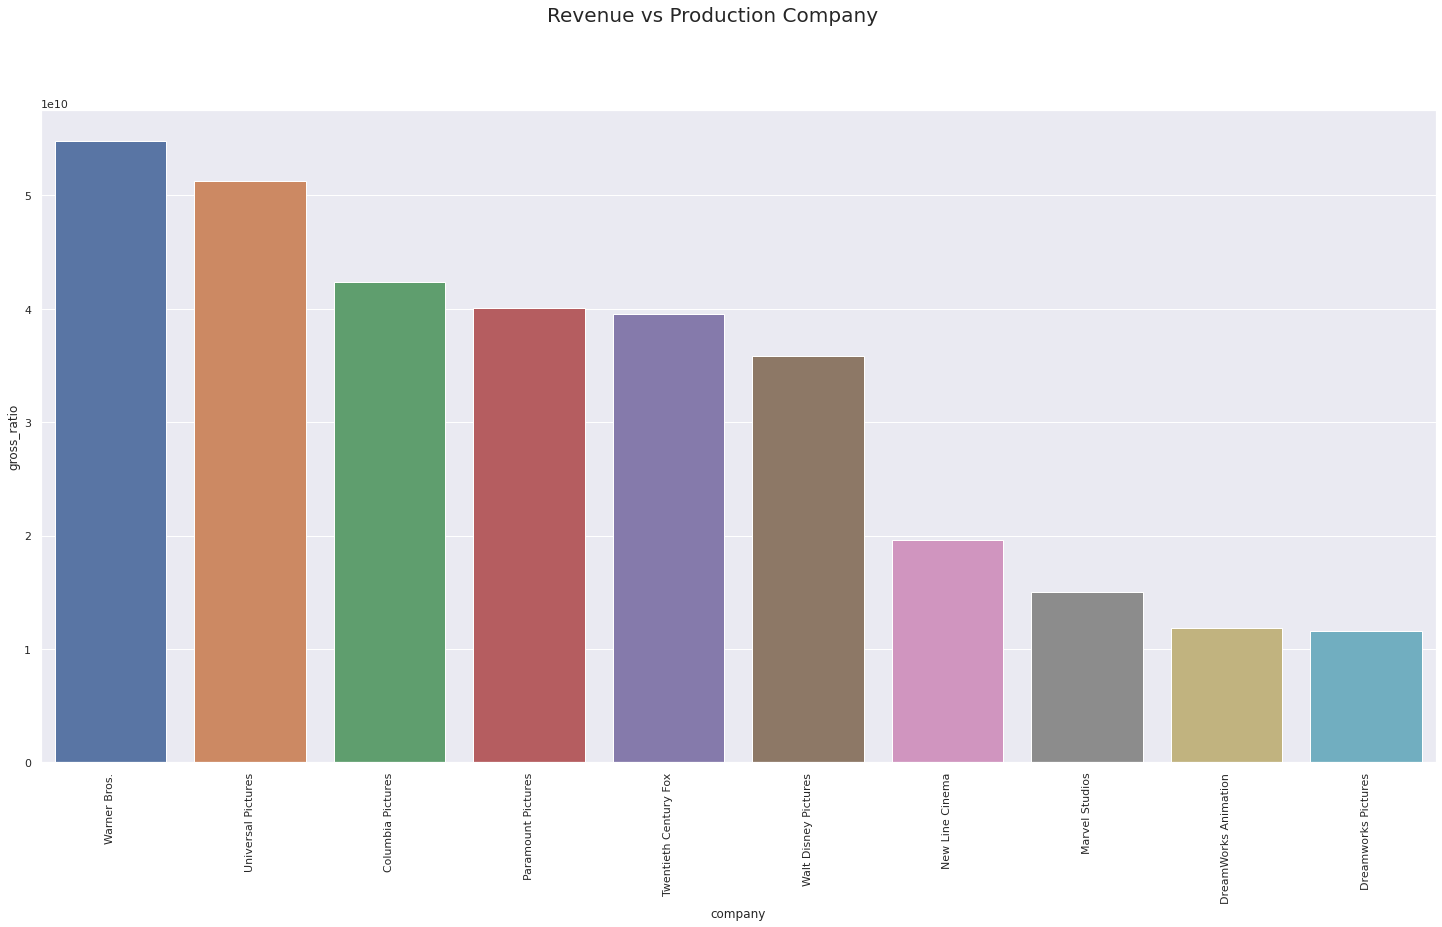

In [ ]:
#we also also compare with revenue as a whole
company_inv_num = 10

company_gross = df.groupby('company')['gross'].agg(gross_ratio='sum').reset_index()
company_gross.sort_values(by=['gross_ratio'], ascending=False, inplace=True, ignore_index=True)

company_gross = company_gross.iloc[:company_inv_num]
company_gross

ax5 = sns.barplot( x='company', y='gross_ratio', data=company_gross)
plt.xticks(rotation=90)
plt.suptitle('Revenue vs Production Company ',fontsize=20, y=1)


With revenue we see that Warner Bros had the highest movie investment in general

## Determining which star’s and director’s movies have the highest possibility of income success based on previous successes

Text(0.5, 1, 'Directors possibility of income success based on previous successes')

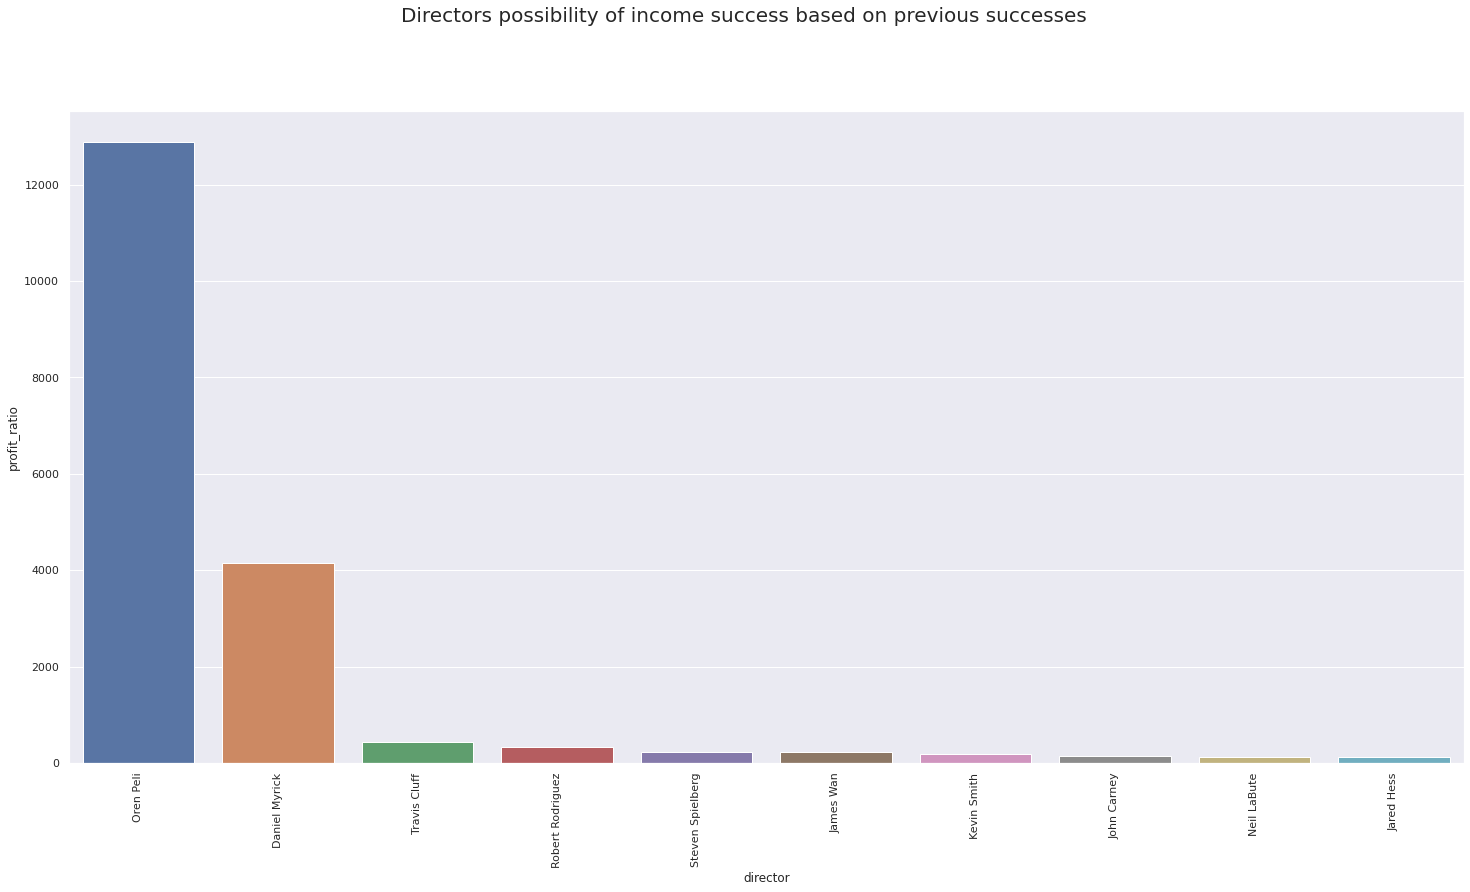

In [ ]:
#start with the director
top_director_num = 10

director_gross = df.groupby('director')['profit_ratio'].agg(profit_ratio='sum').reset_index()
director_gross.sort_values(by=['profit_ratio'], ascending=False, inplace=True, ignore_index=True)

director_gross = director_gross.iloc[:top_director_num]
director_gross

sns.barplot( x='director', y='profit_ratio', data=director_gross)
plt.xticks(rotation=90)
plt.suptitle('Directors possibility of income success based on previous successes',fontsize=20, y=1)

Oren peli is the director with the highest revenue across the years. Again this is due to a specific Horror movie which had sky rocketing profit

Text(0.5, 1, 'Directors possibility of income success based on previous successes')

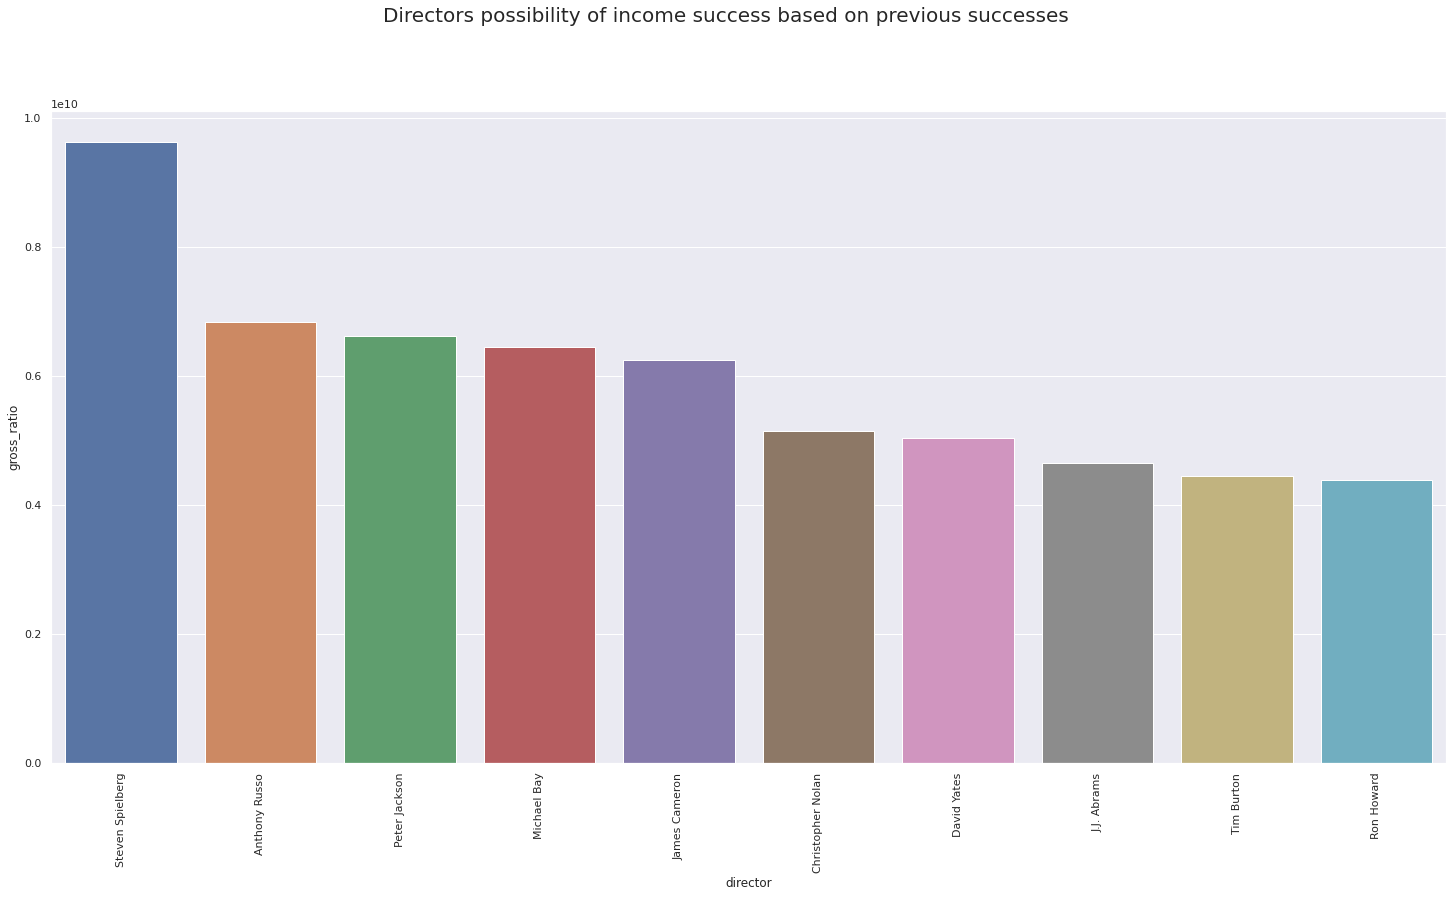

In [ ]:
#We view with gross narrowing down on director
top_director_num = 10

director_gross = df.groupby('director')['gross'].agg(gross_ratio='sum').reset_index()
director_gross.sort_values(by=['gross_ratio'], ascending=False, inplace=True, ignore_index=True)

director_gross = director_gross.iloc[:top_director_num]
director_gross

sns.barplot( x='director', y='gross_ratio', data=director_gross)
plt.xticks(rotation=90)
plt.suptitle('Directors possibility of income success based on previous successes',fontsize=20, y=1)

Steven Speilsberg had the highest gross revenue overall

Text(0.5, 1, 'Writers possibility of income success based on previous successes')

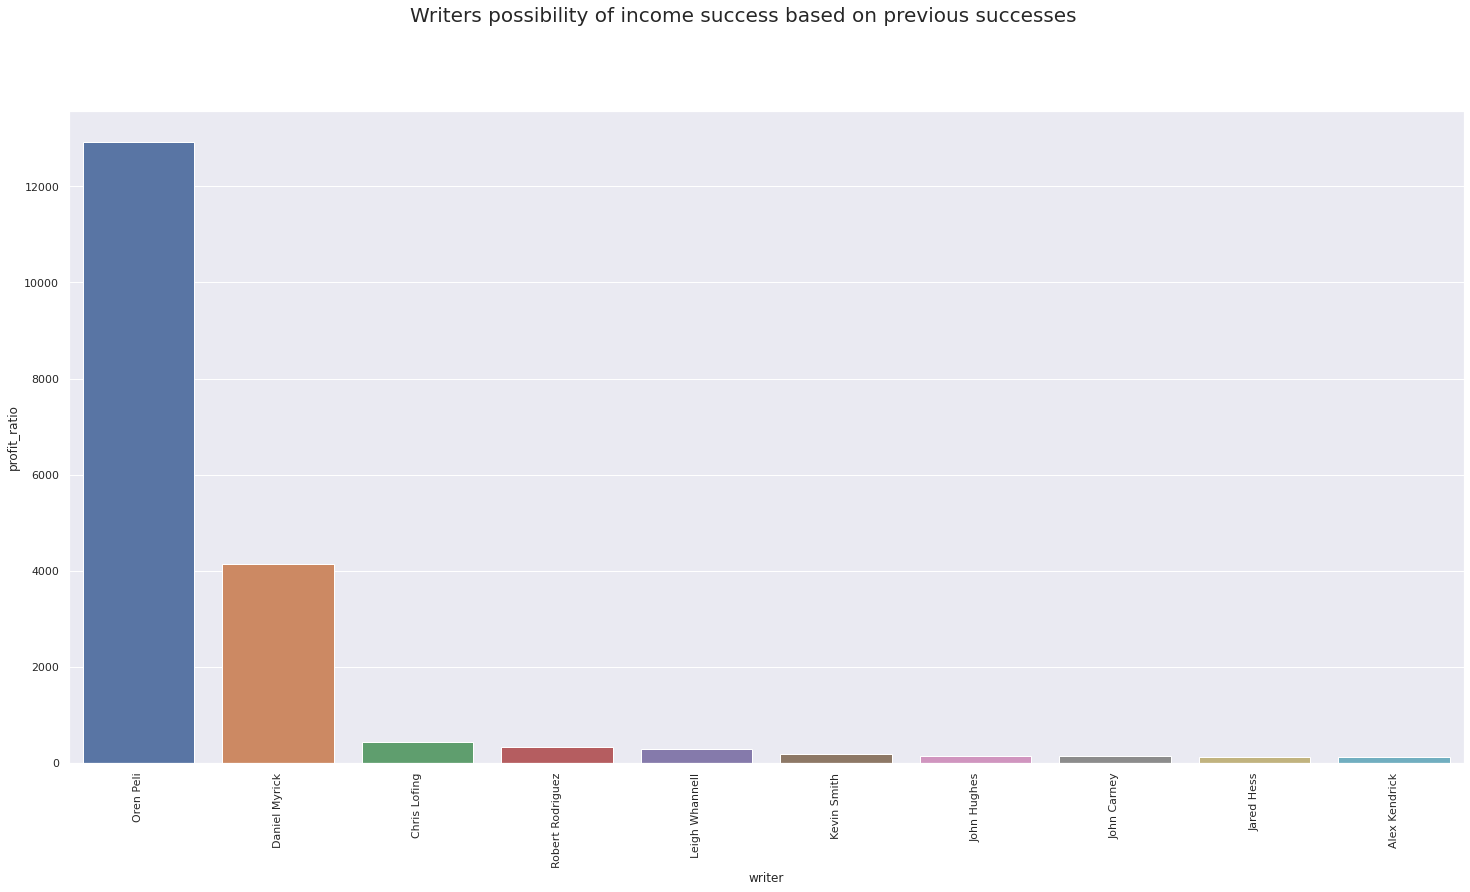

In [ ]:
#we sort by writers
top_writer_num = 10

writer_gross = df.groupby('writer')['profit_ratio'].agg(profit_ratio='sum').reset_index()
writer_gross.sort_values(by=['profit_ratio'], ascending=False, inplace=True, ignore_index=True)

writer_gross = writer_gross.iloc[:top_writer_num]
writer_gross

sns.barplot( x='writer', y='profit_ratio', data=writer_gross)
plt.xticks(rotation=90)
plt.suptitle('Writers possibility of income success based on previous successes',fontsize=20, y=1)

Oren peli is the writer who have highest possibility of income success based on previous successes




Note: Outlier

Text(0.5, 1, 'Writer possibility of income success based on previous successes')

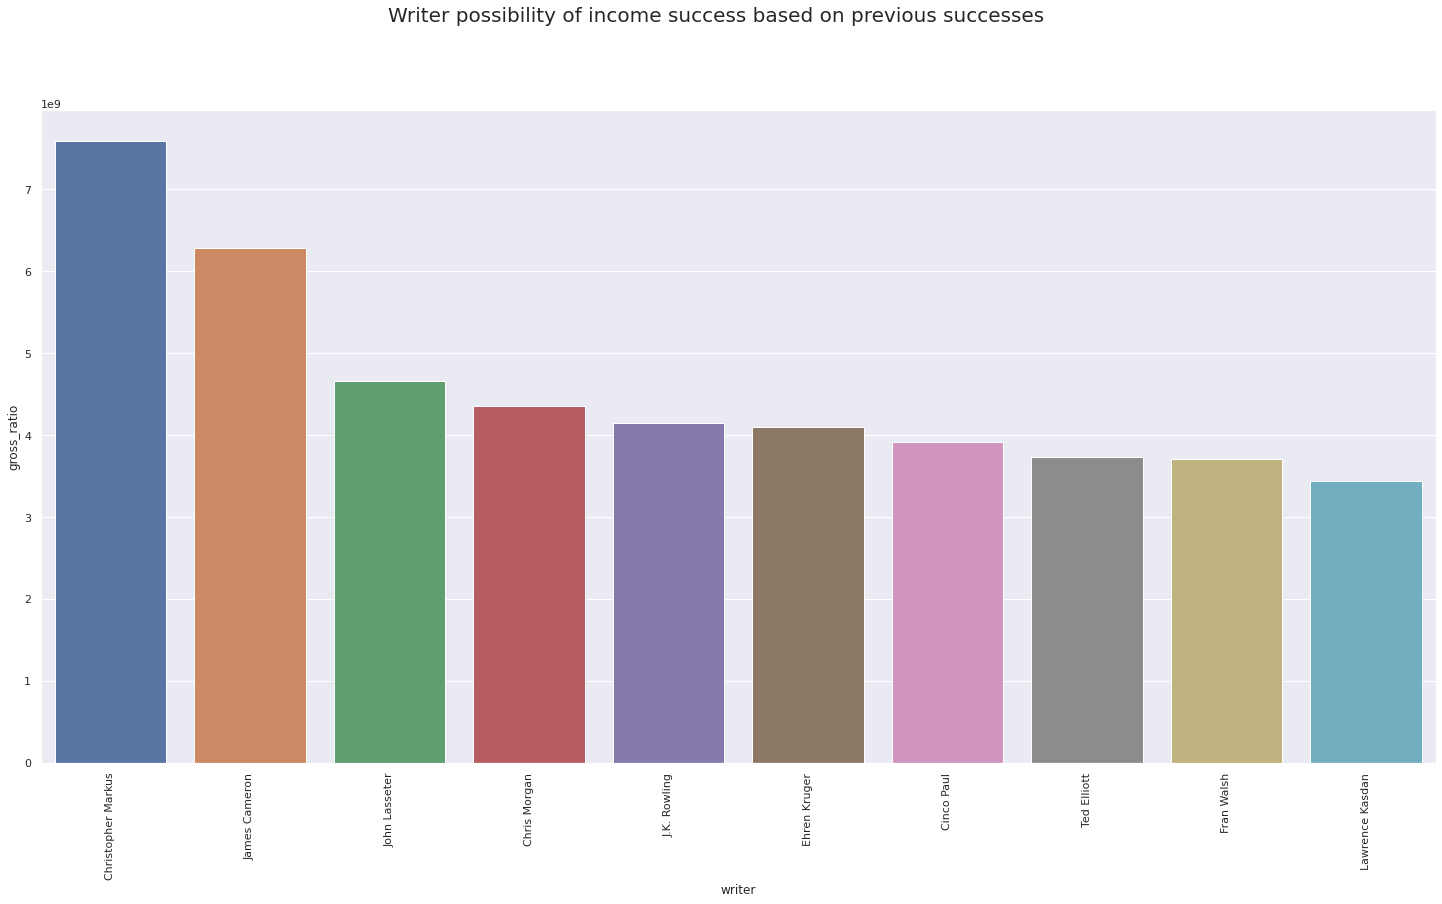

In [ ]:
#we focus with gross overall
top_writer_num = 10

writer_gross = df.groupby('writer')['gross'].agg(gross_ratio='sum').reset_index()
writer_gross.sort_values(by=['gross_ratio'], ascending=False, inplace=True, ignore_index=True)

writer_gross = writer_gross.iloc[:top_writer_num]
writer_gross

sns.barplot( x='writer', y='gross_ratio', data=writer_gross)
plt.xticks(rotation=90)
plt.suptitle('Writer possibility of income success based on previous successes',fontsize=20, y=1)

Chrisptopher markus overall had the highest gross revenue

In [ ]:
#we move to star(actors)
top_stars_num = 10

star_gross = df.groupby('star')['profit_ratio'].agg(profit_ratio='sum').reset_index()
star_gross.sort_values(by=['profit_ratio'], ascending=False, inplace=True, ignore_index=True)

star_gross = star_gross.iloc[:top_stars_num]


Text(0.5, 1, 'Actors possibility of income success based on previous successes')

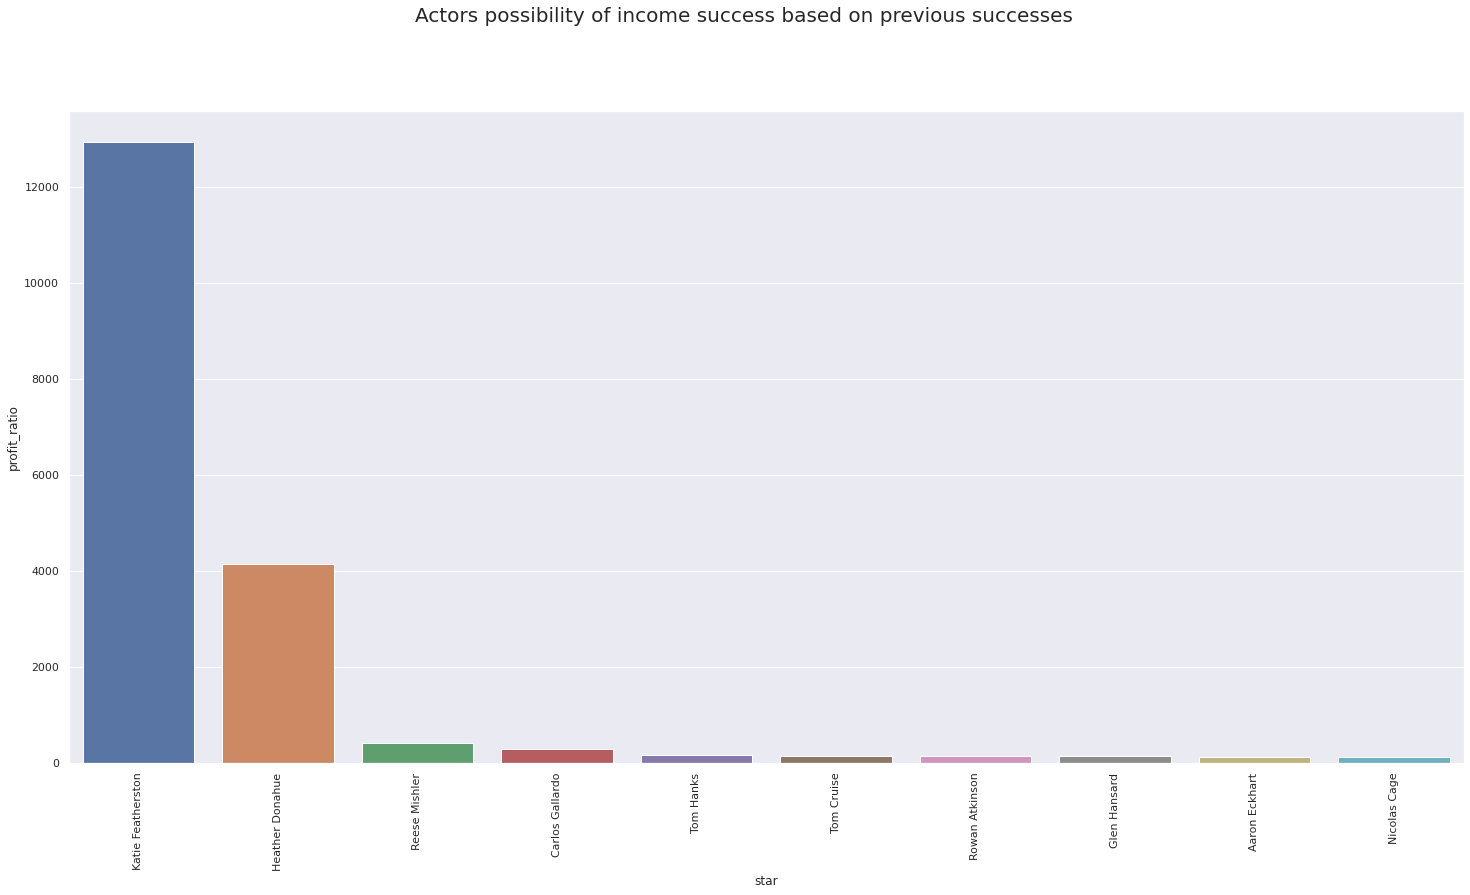

In [ ]:


sns.barplot( x='star', y='profit_ratio', data=star_gross)
plt.xticks(rotation=90)
plt.suptitle('Actors possibility of income success based on previous successes', fontsize=20, y=1)

Katie featherson was the actor with highest profit ratio

Text(0.5, 1, 'Actors possibility of income success based on previous successes')

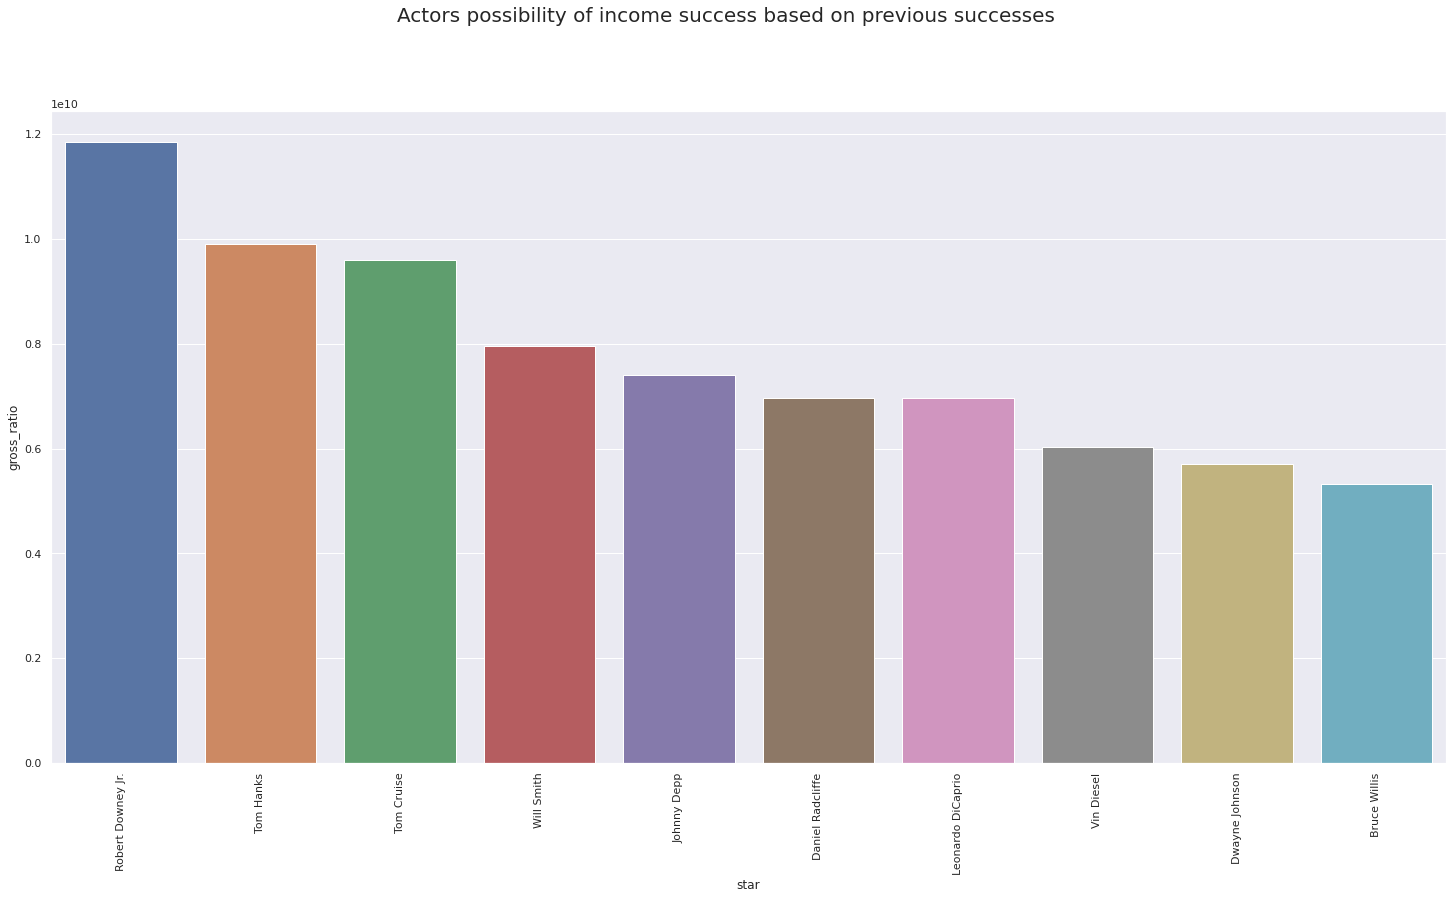

In [ ]:
#We take a look with focus on gross in respect to actors
top_actor_num = 10

actor_gross = df.groupby('star')['gross'].agg(gross_ratio='sum').reset_index()
actor_gross.sort_values(by=['gross_ratio'], ascending=False, inplace=True, ignore_index=True)

actor_gross = actor_gross.iloc[:top_director_num]
director_gross

sns.barplot( x='star', y='gross_ratio', data=actor_gross)
plt.xticks(rotation=90)
plt.suptitle('Actors possibility of income success based on previous successes',fontsize=20, y=1)

Robert Downer Jr was the actor with the highest gross revenue overall

## **Determining which year was a good movie year and why**

In [ ]:
#we want to find the year with the highest revenue
year_num = 34

year_gross = df.groupby('year')['profit_ratio'].agg(profit_ratio='sum').reset_index()
year_gross.sort_values(by=['profit_ratio'], ascending=False, inplace=True, ignore_index=True)

year_gross = year_gross.iloc[:year_num]


Text(0.5, 1, 'Year revenue across the board')

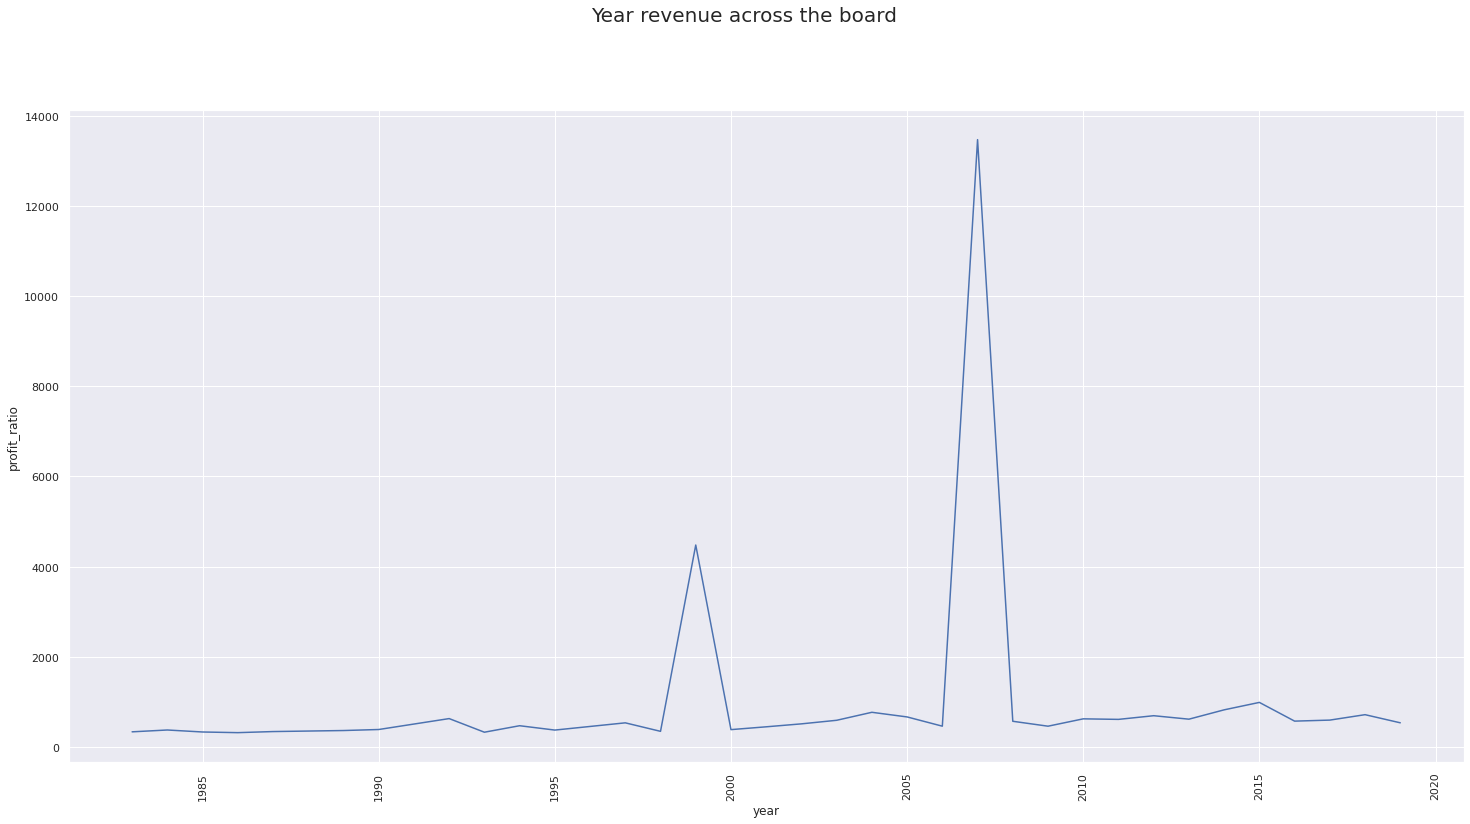

In [ ]:
#we plot the graph
sns.lineplot( x='year', y='profit_ratio', data=year_gross)
plt.xticks(rotation=90)
plt.suptitle('Year revenue across the board', fontsize=20, y=1)

The best year is with the highest profit ratio was 2007

Text(0.5, 1, 'Best movie year')

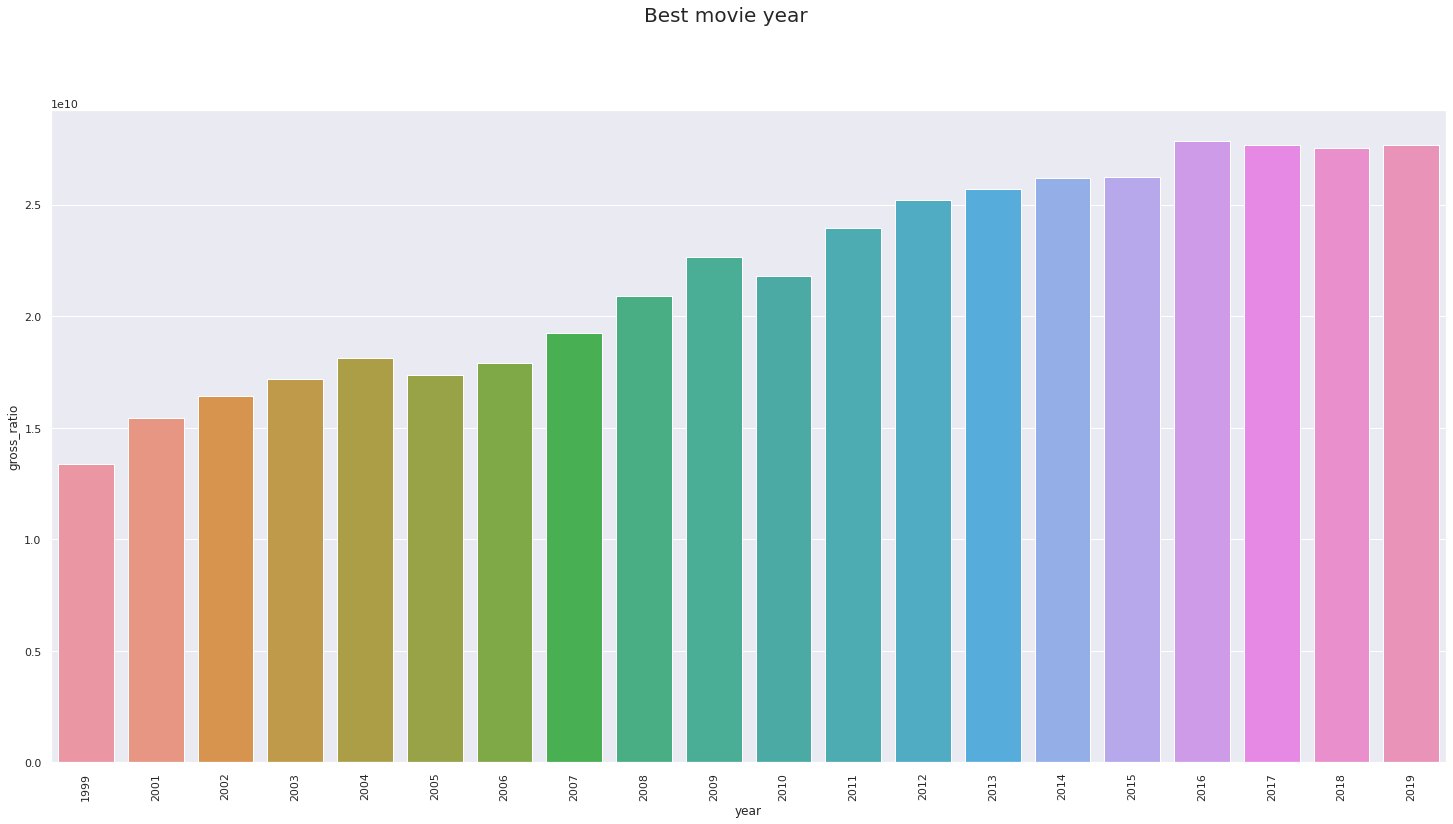

In [ ]:
#we focus on gross overall
year_num = 20

year_gross = df.groupby('year')['gross'].agg(gross_ratio='sum').reset_index()
year_gross.sort_values(by=['gross_ratio'], ascending=False, inplace=True, ignore_index=True)

year_gross = year_gross.iloc[:year_num]
year_gross

sns.barplot( x='year', y='gross_ratio', data=year_gross)
plt.xticks(rotation=90)
plt.suptitle('Best movie year',fontsize=20, y=1)

The best year is with the gross revenue was 2016

## **Determining highest grossing film by different attributes**

In [ ]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'profit_ratio'],
      dtype='object')

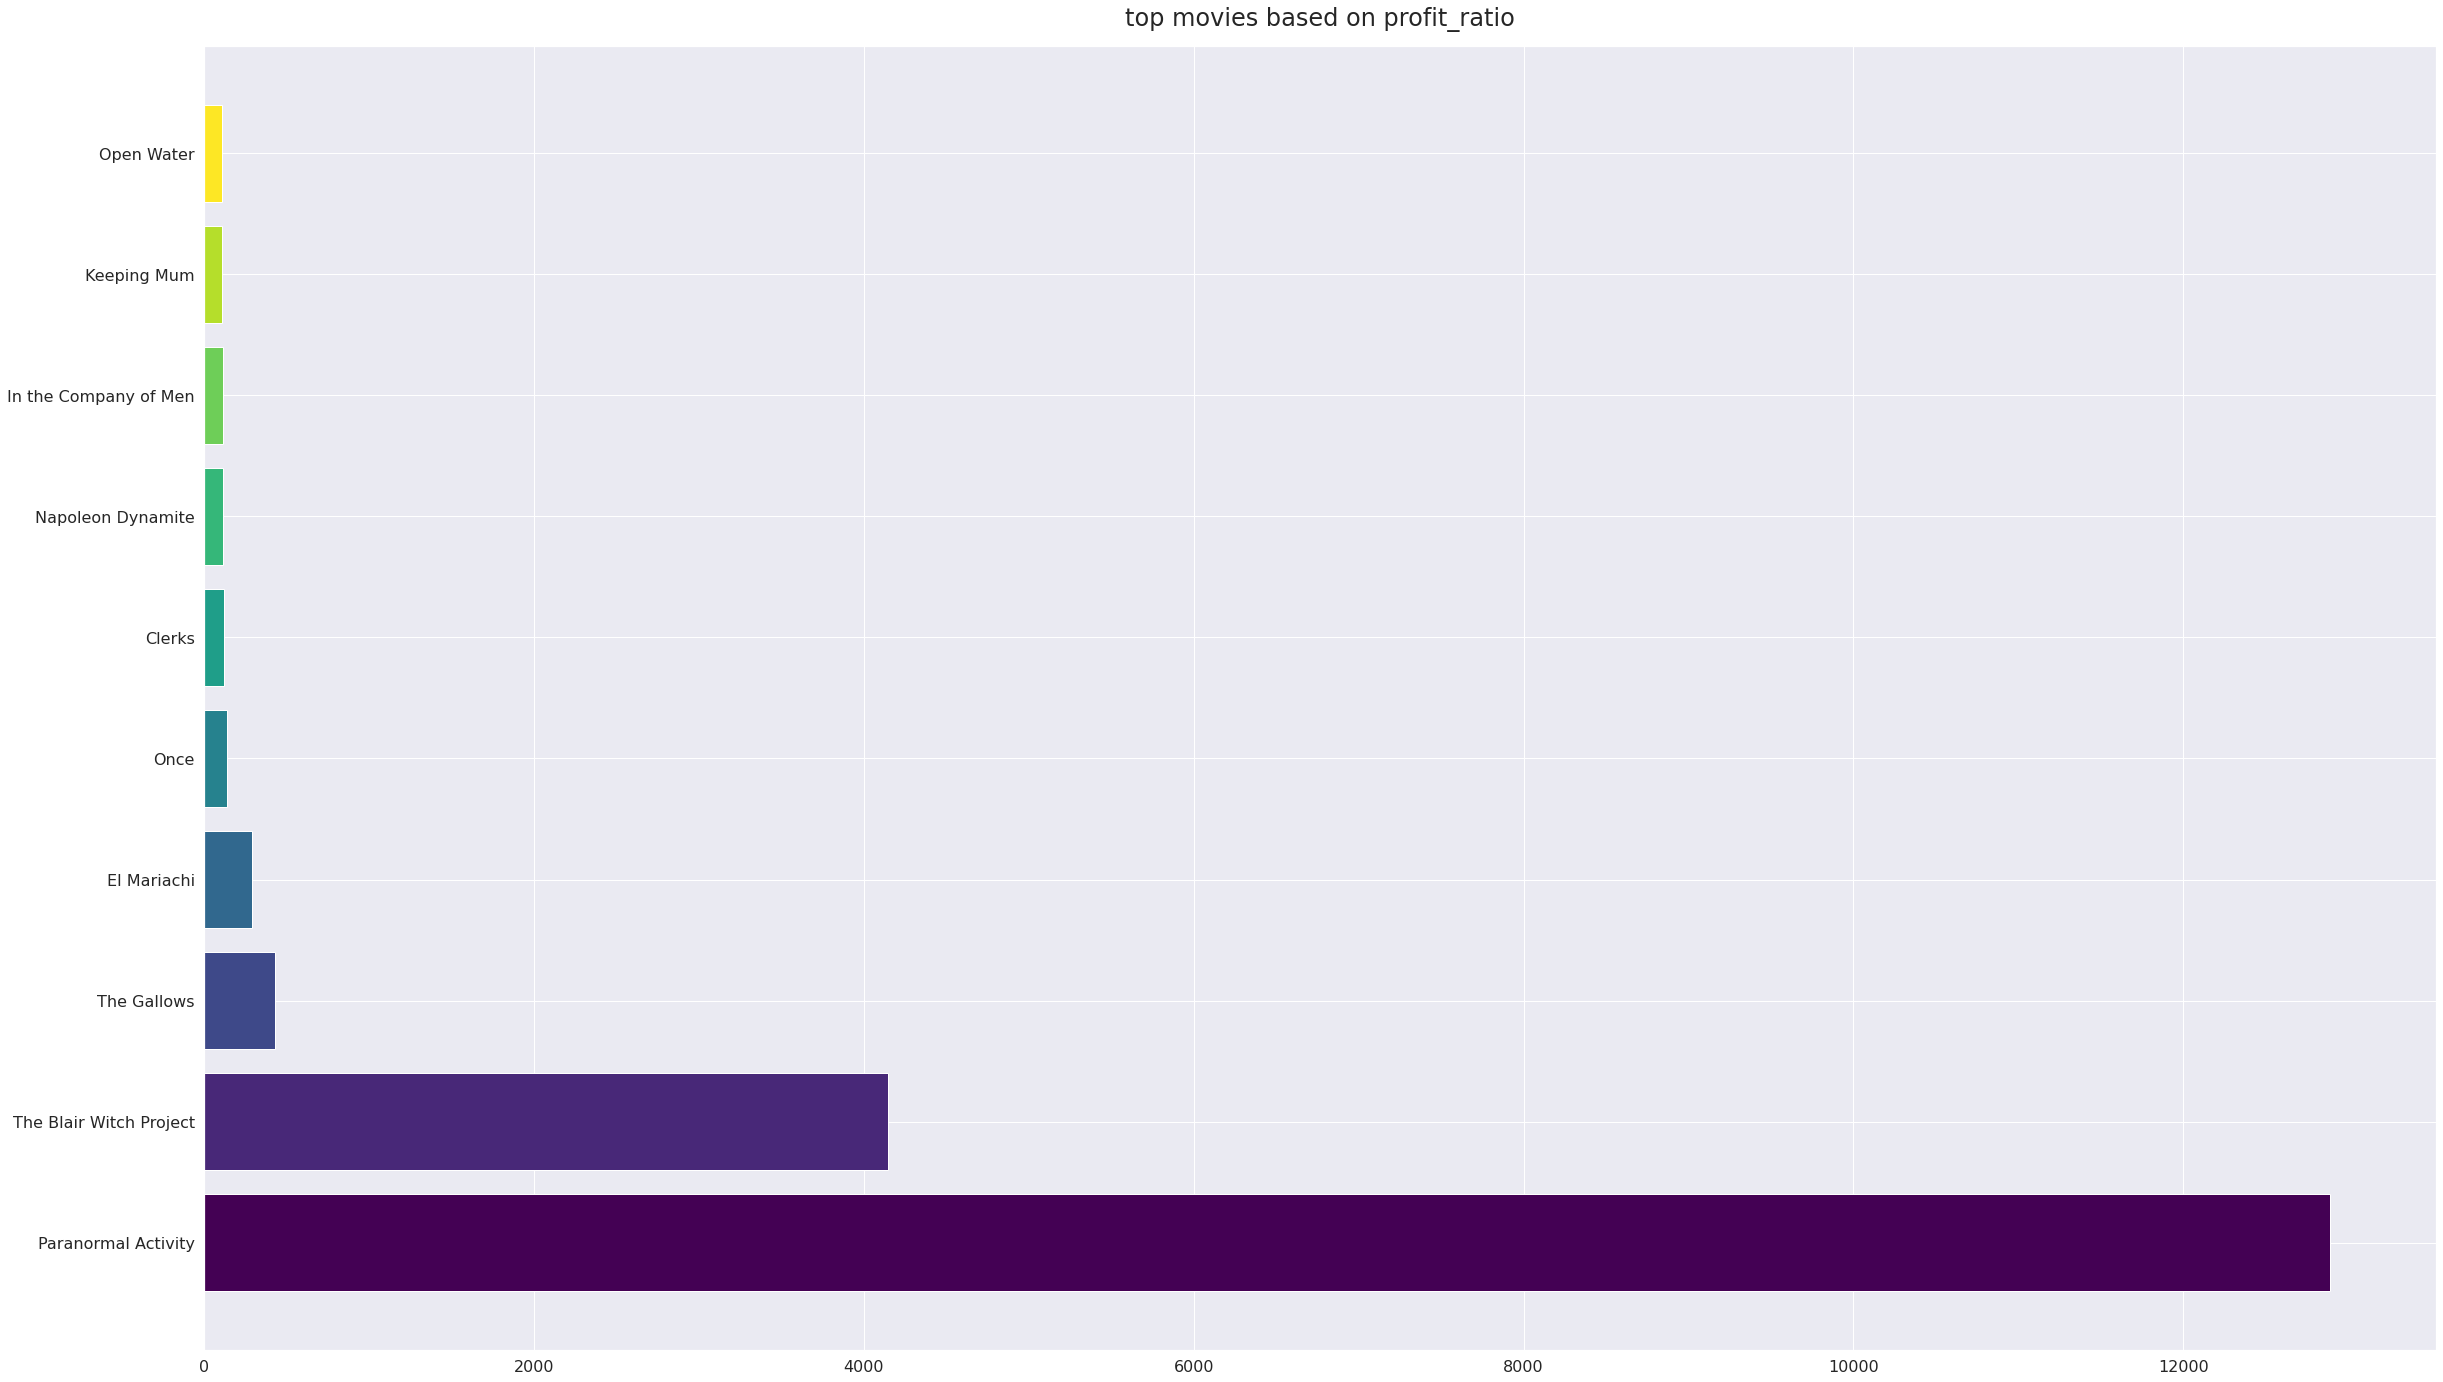

In [ ]:
#Let have a look at the highest movies by various attributes
#profit ratio
top_movie_num = 10
top_movies_based_on = ['profit_ratio' ]

fig, ax = plt.subplots(len(top_movies_based_on)//3, 3, figsize=(40,24))
colors = plt.cm.get_cmap('viridis', top_movie_num)

for i, col in enumerate(top_movies_based_on):
    top_movies_by = df.sort_values(by=[col], ascending=False).head(top_movie_num)
    r, c = i//3, i%3
    plt.barh(top_movies_by["name"], top_movies_by[col], color=colors.colors)
    plt.title(f"top movies based on {col}", fontsize=24, pad=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
   
    


The highest movie by profit ratio was Paranormal activity

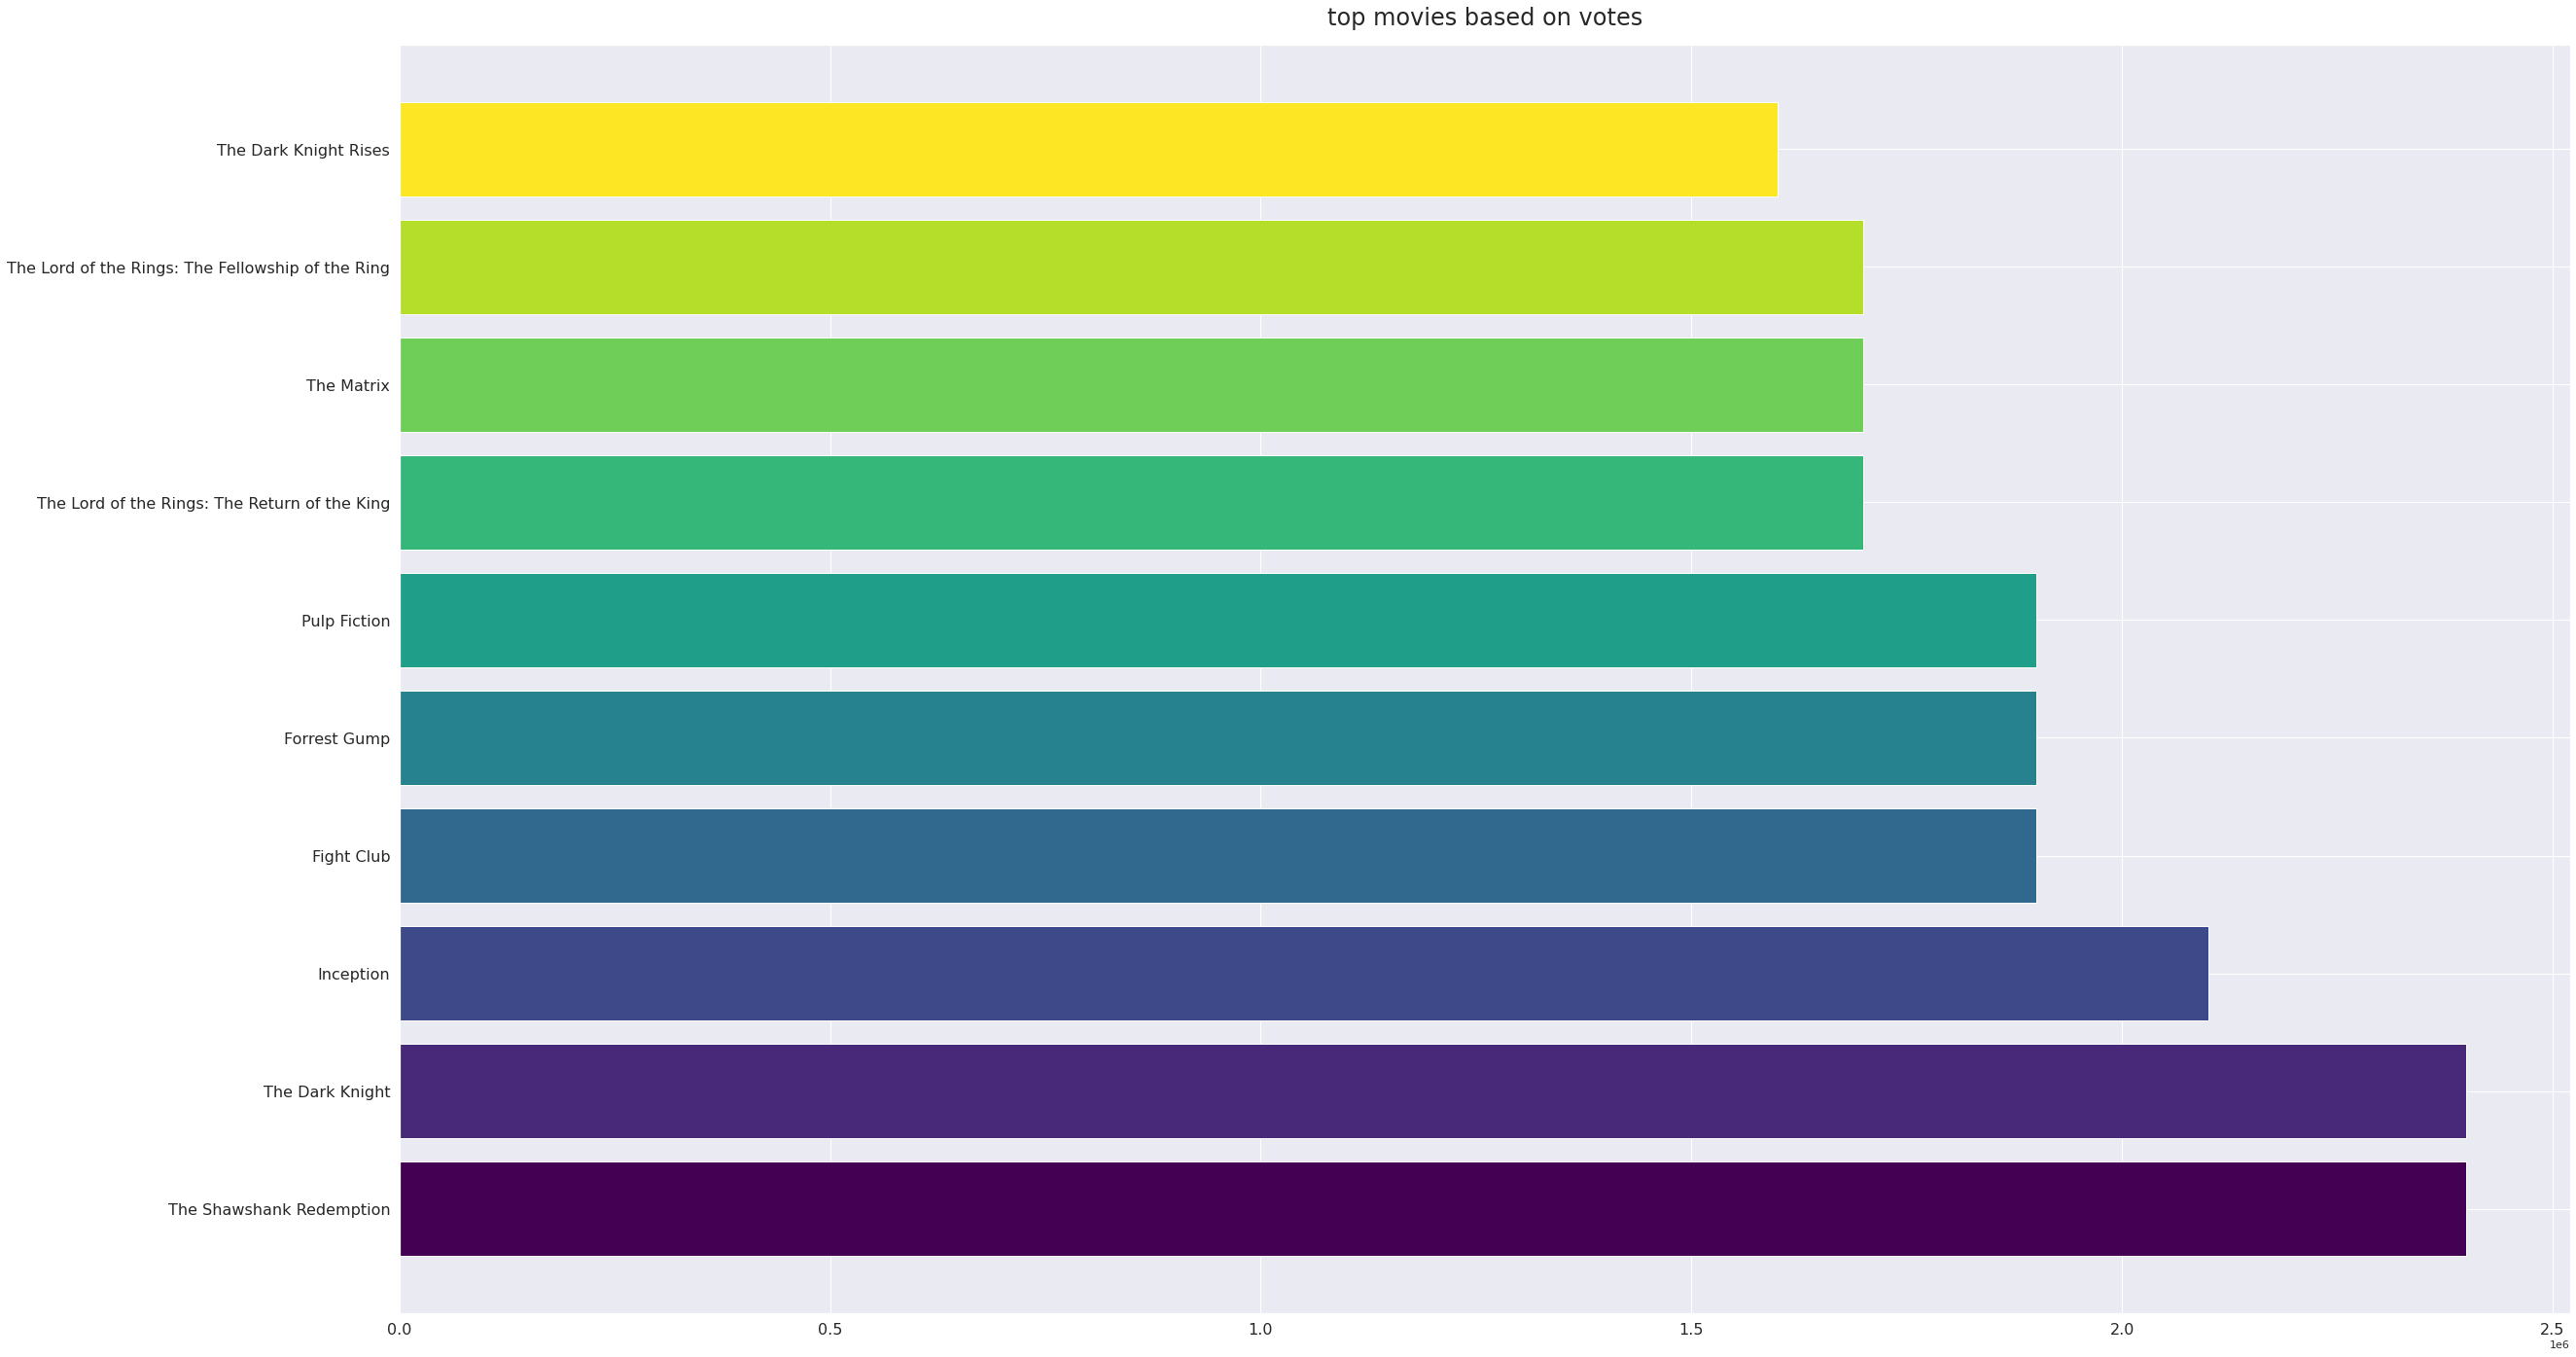

In [ ]:
#Let have a look at the highest movies by various attributes
#votes
top_movie_num = 10
top_movies_based_on = ['votes' ]

fig, ax = plt.subplots(len(top_movies_based_on)//3, 3, figsize=(40,24))
colors = plt.cm.get_cmap('viridis', top_movie_num)

for i, col in enumerate(top_movies_based_on):
    top_movies_by = df.sort_values(by=[col], ascending=False).head(top_movie_num)
    r, c = i//3, i%3
    plt.barh(top_movies_by["name"], top_movies_by[col], color=colors.colors)
    plt.title(f"top movies based on {col}", fontsize=24, pad=20)
    plt.tick_params(axis='both', which='major', labelsize=16)

The highest movie by votes was The shawshank redemption

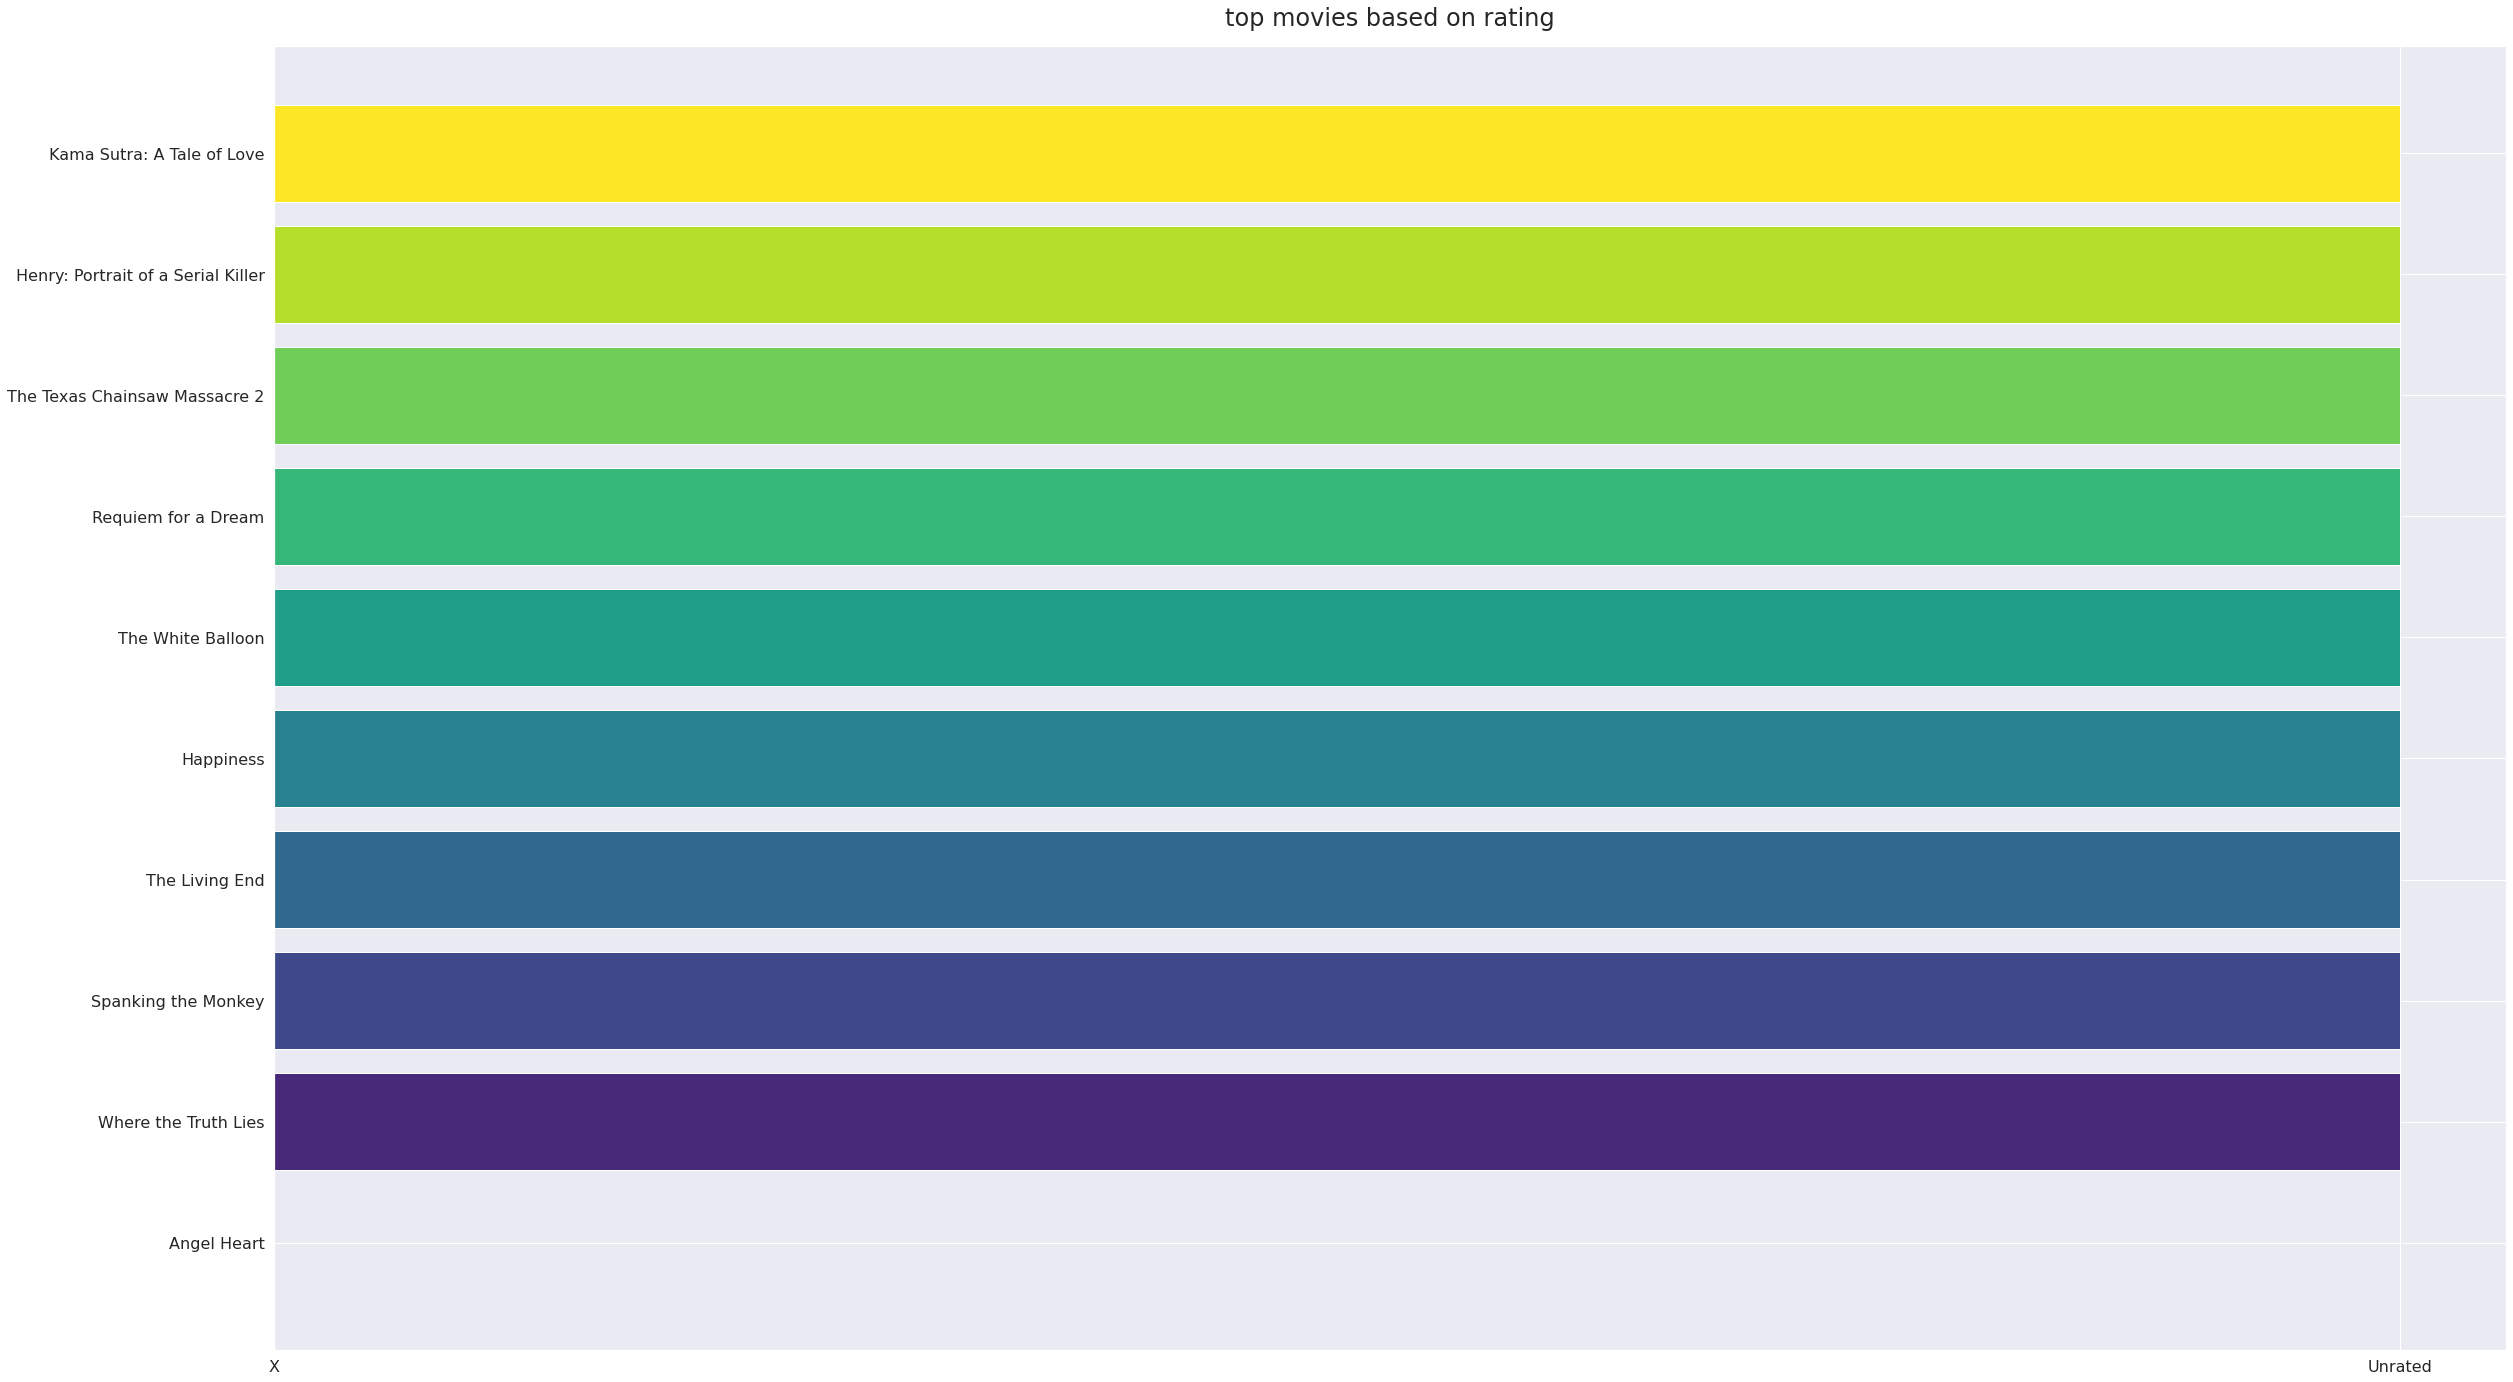

In [ ]:
##Let have a look at the highest movies by various attributes
#rating
top_movie_num = 10
top_movies_based_on = ['rating' ]

fig, ax = plt.subplots(len(top_movies_based_on)//3, 3, figsize=(40,24))
colors = plt.cm.get_cmap('viridis', top_movie_num)

for i, col in enumerate(top_movies_based_on):
    top_movies_by = df.sort_values(by=[col], ascending=False).head(top_movie_num)
    r, c = i//3, i%3
    plt.barh(top_movies_by["name"], top_movies_by[col], color=colors.colors)
    plt.title(f"top movies based on {col}", fontsize=24, pad=20)
    plt.tick_params(axis='both', which='major', labelsize=16)

Top movies had the same rating which is R rating

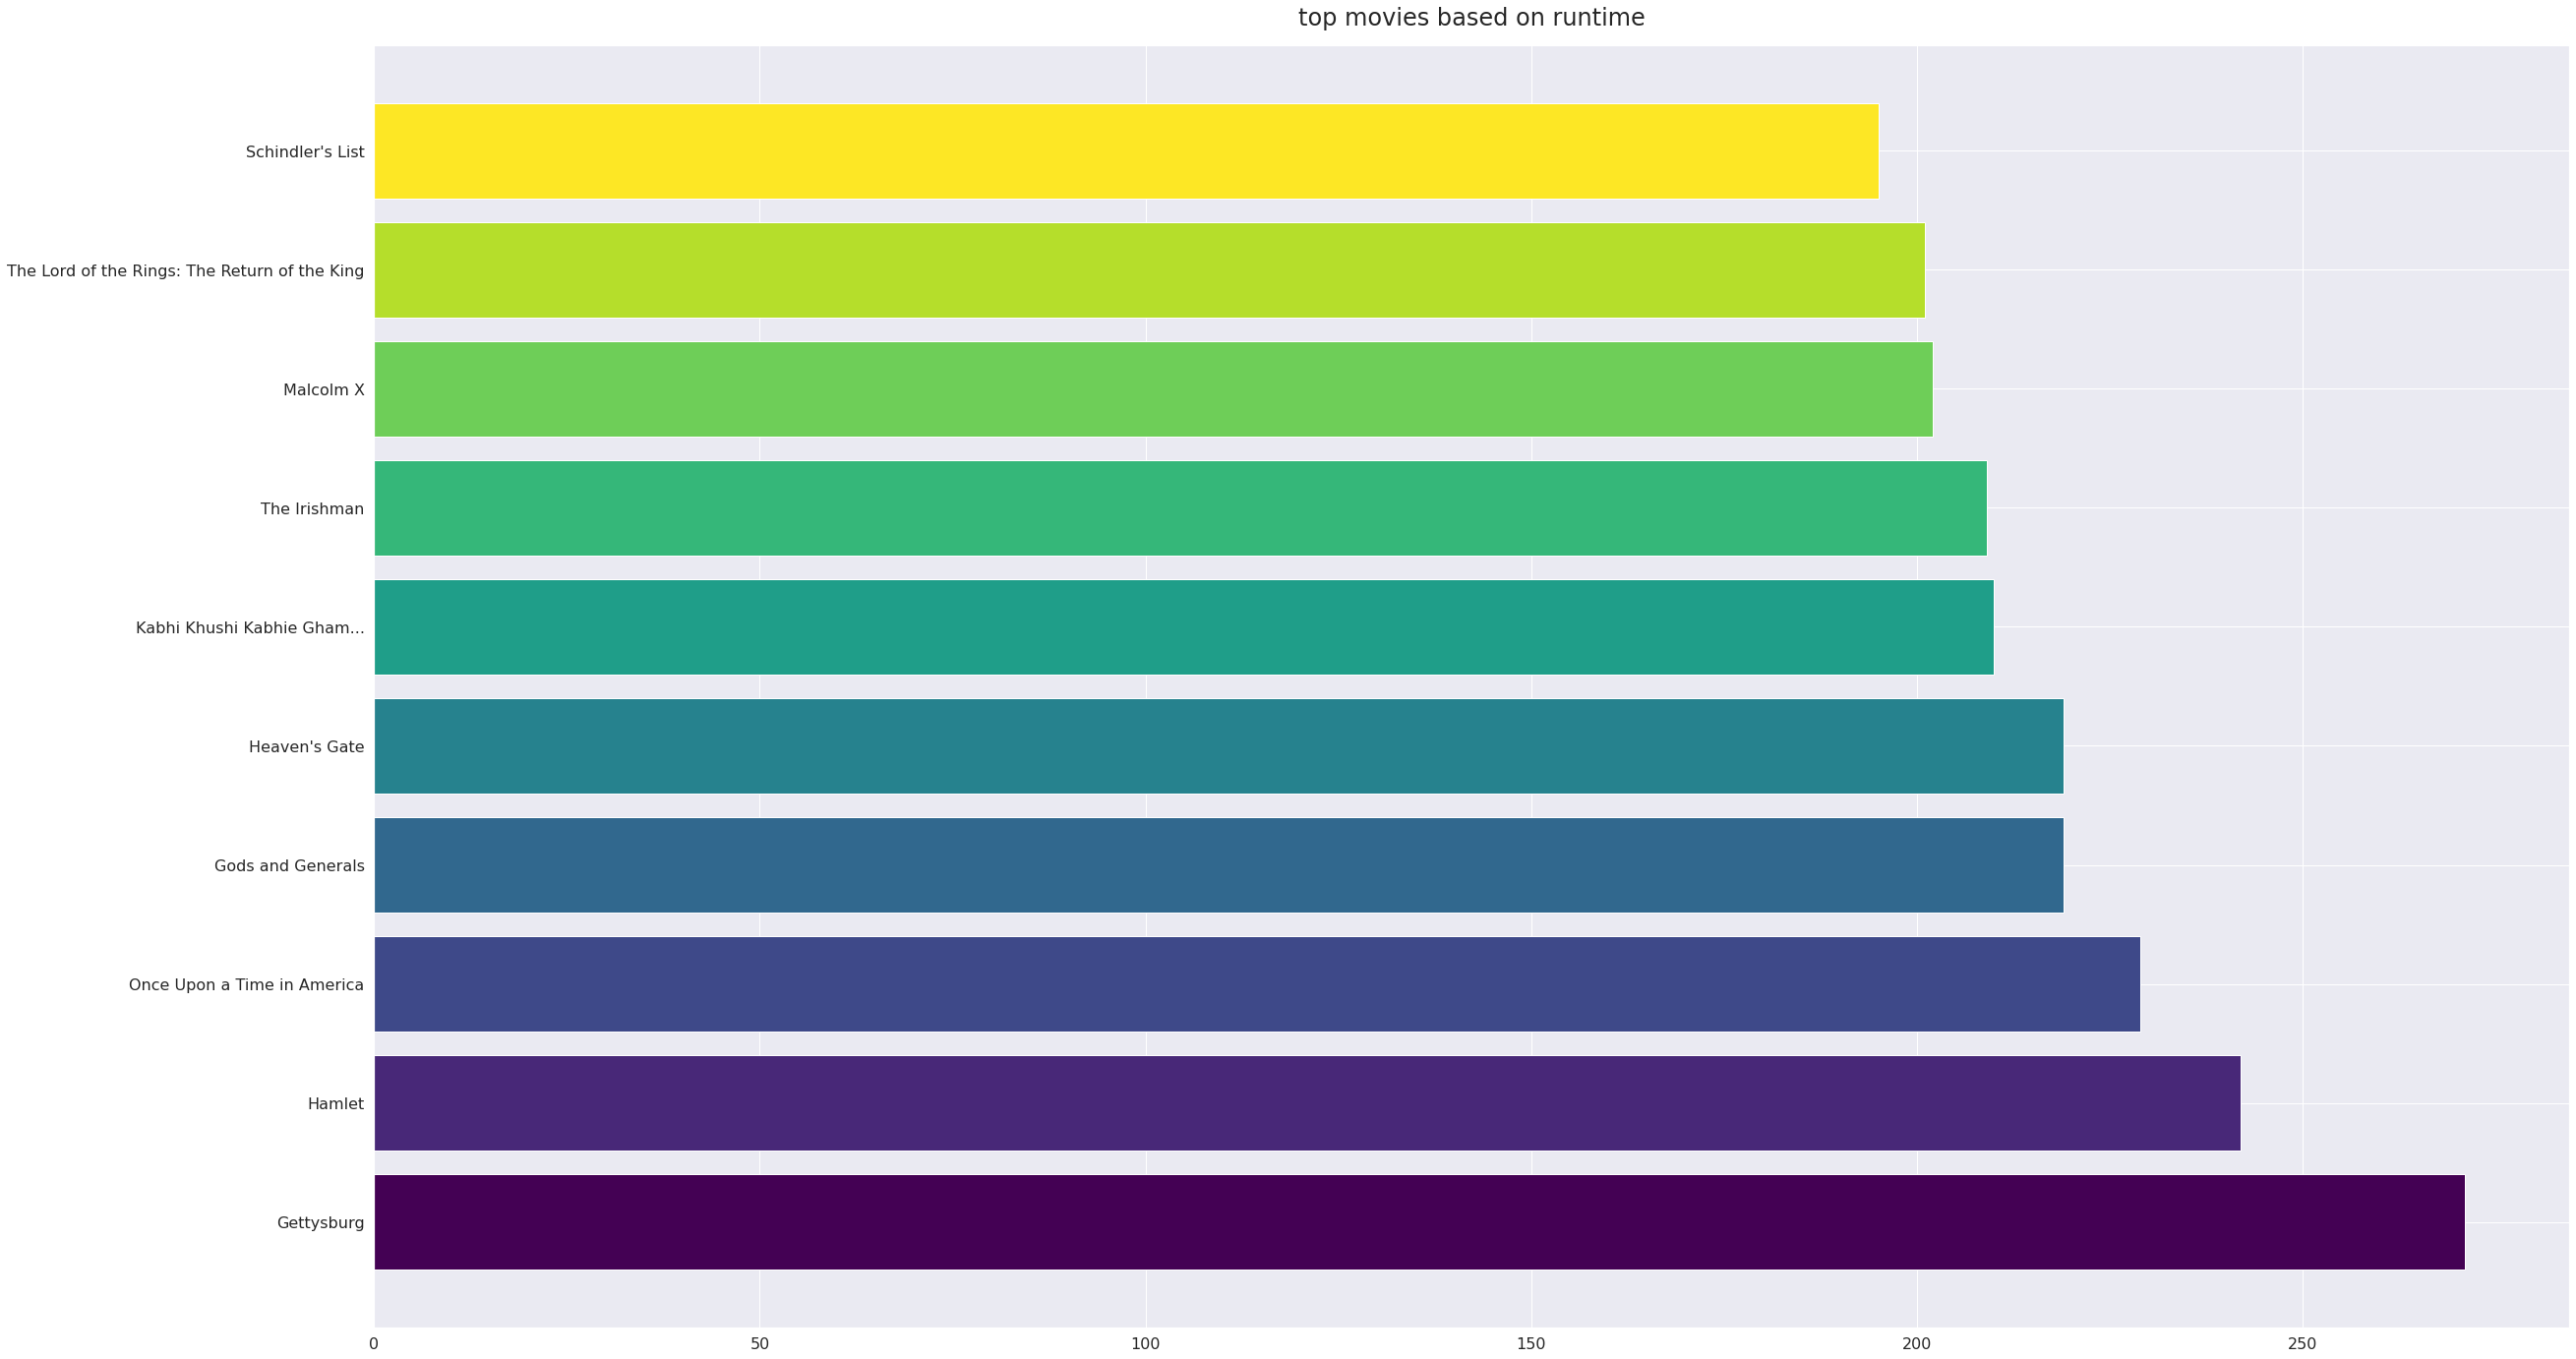

In [ ]:
#Let have a look at the highest movies by various attributes
#runtime
top_movie_num = 10
top_movies_based_on = ['runtime' ]

fig, ax = plt.subplots(len(top_movies_based_on)//3, 3, figsize=(40,24))
colors = plt.cm.get_cmap('viridis', top_movie_num)

for i, col in enumerate(top_movies_based_on):
    top_movies_by = df.sort_values(by=[col], ascending=False).head(top_movie_num)
    r, c = i//3, i%3
    plt.barh(top_movies_by["name"], top_movies_by[col], color=colors.colors)
    plt.title(f"top movies based on {col}", fontsize=24, pad=20)
    plt.tick_params(axis='both', which='major', labelsize=16)

The highest movie by runtime was Gettysburg

## **Determining the country of origin that produces the movies with the highest film**

In [ ]:
#we want to find the country that produces highest film
country_num = 20

country_gross = df.groupby('country')['profit_ratio'].agg(profit_ratio='sum').reset_index()
country_gross.sort_values(by=['profit_ratio'], ascending=False, inplace=True, ignore_index=True)

country_gross = country_gross.iloc[:country_num]

Text(0.5, 1, 'country of origin that produces the movies with the highest film')

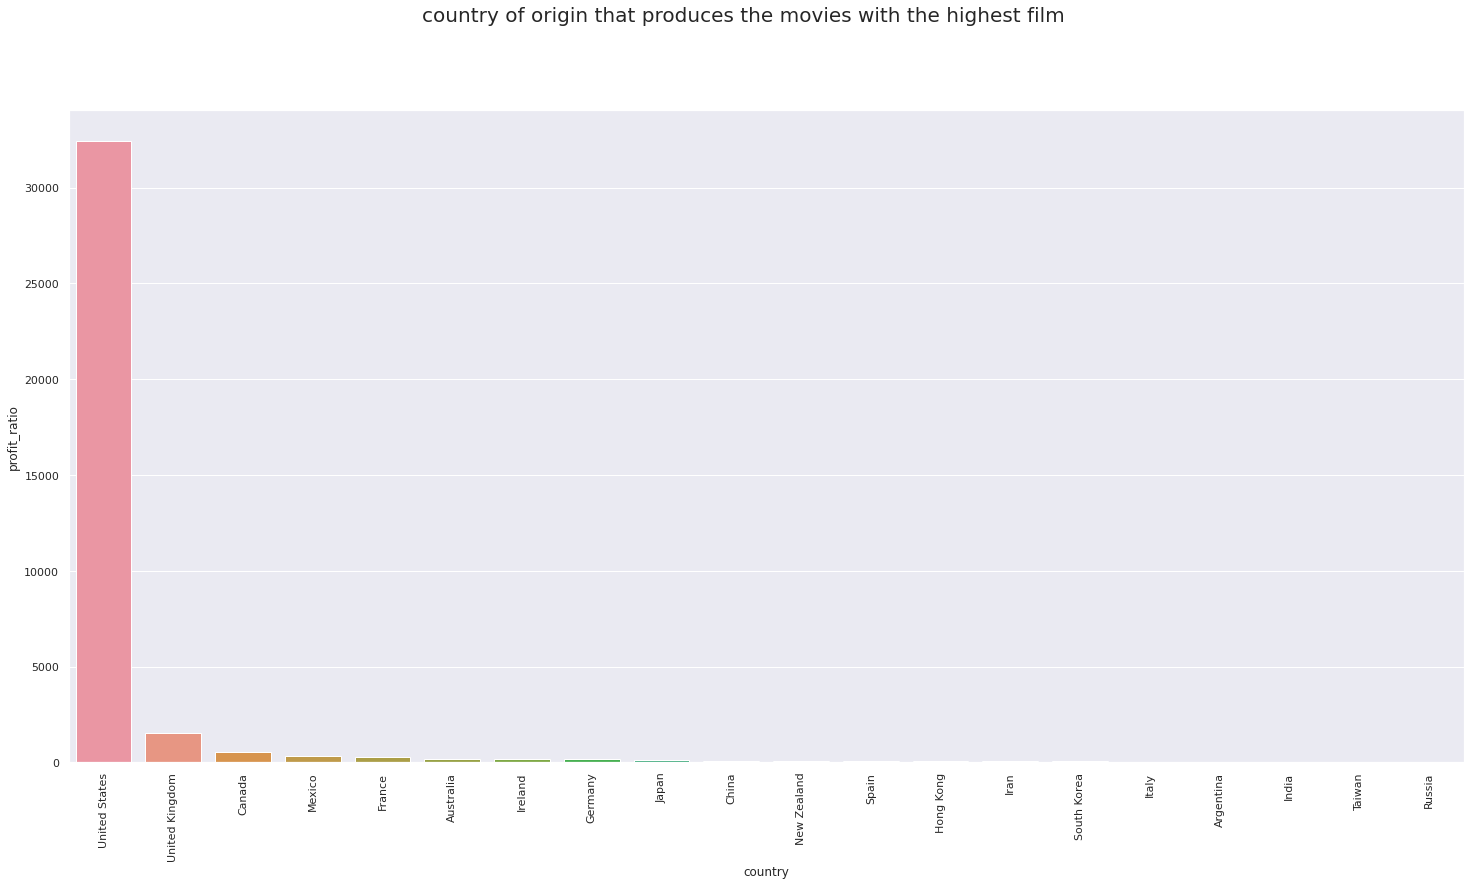

In [ ]:
#we plot the graph
sns.barplot( x='country', y='profit_ratio', data=country_gross)
plt.xticks(rotation=90)
plt.suptitle('country of origin that produces the movies with the highest film', fontsize=20, y=1)

United states is the country of origin that produces the movies with the highest film

Text(0.5, 1, 'country of origin that produces the movies with the highest film')

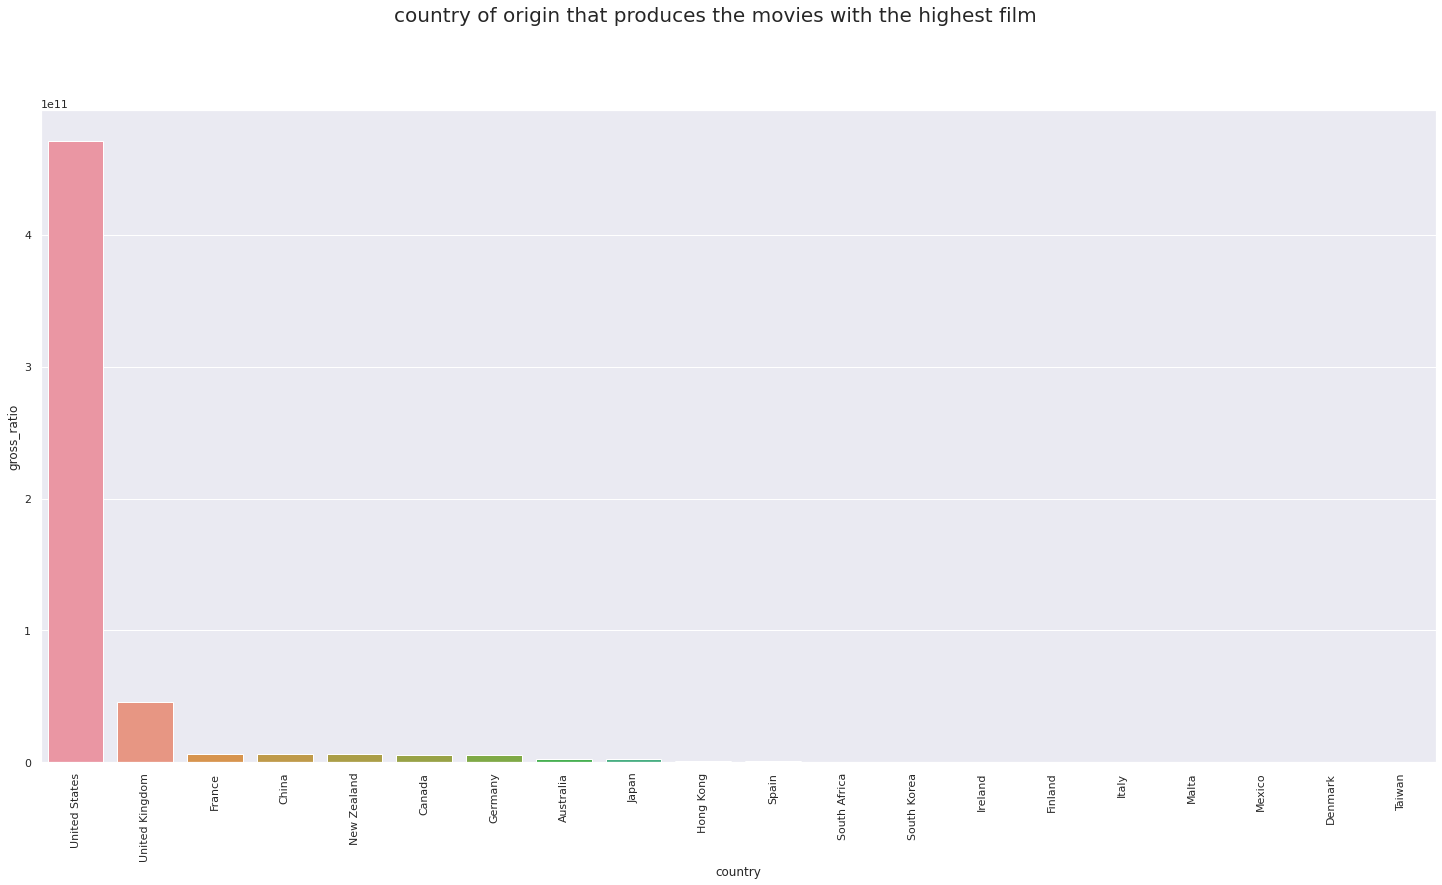

In [ ]:
country_num = 20

country_gross = df.groupby('country')['gross'].agg(gross_ratio='sum').reset_index()
country_gross.sort_values(by=['gross_ratio'], ascending=False, inplace=True, ignore_index=True)

country_gross = country_gross.iloc[:country_num]

sns.barplot( x='country', y='gross_ratio', data=country_gross)
plt.xticks(rotation=90)
plt.suptitle('country of origin that produces the movies with the highest film', fontsize=20, y=1)

## **Relationship between the user rating and the income of a movie.**




In [ ]:
df['rating'].unique()

array(['R', 'PG', 'G', 'NC-17', 'Approved', 'Not Rated', 'PG-13',
       'Missing', 'Unrated', 'X', 'TV-MA'], dtype=object)

Text(0.5, 1, 'Rating vs revenue')

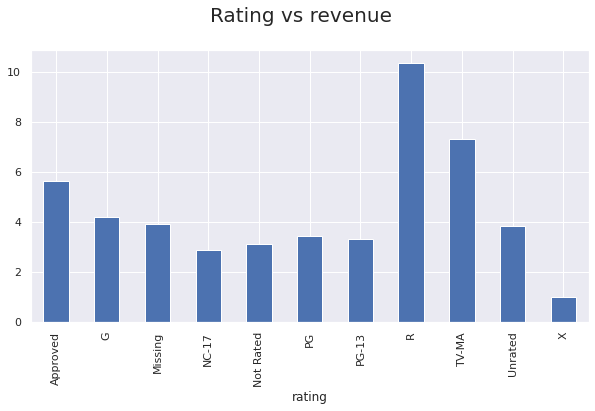

In [ ]:
df[['rating','profit_ratio']].groupby('rating')['profit_ratio'].mean().plot.bar(figsize = (10, 5))
plt.suptitle('Rating vs revenue', fontsize=20, y=1)

In [ ]:
df.sample()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit_ratio
6827,Our Brand Is Crisis,R,Comedy,2015,"October 30, 2015 (United States)",6.1,21000.0,David Gordon Green,Rachel Boynton,Sandra Bullock,United States,28000000,8527658,Fortis Films,107.0,0.304559


In [ ]:
# grouping every film by genre

df8= df[['genre', "name"]].groupby(["genre"]).sum()

In [ ]:
df8.sample(4)

,name
genre,
Thriller,The Fourth ProtocolThe House on Carroll Street...
Adventure,The Blue LagoonThe Gods Must Be CrazyPopeyeHea...
Sci-Fi,Jekyll and Hyde... Together AgainBrainstormThe...
Family,E.T. the Extra-TerrestrialThe NutcrackerRaise ...


## Multivariate Analysis


### Numerical Attributes

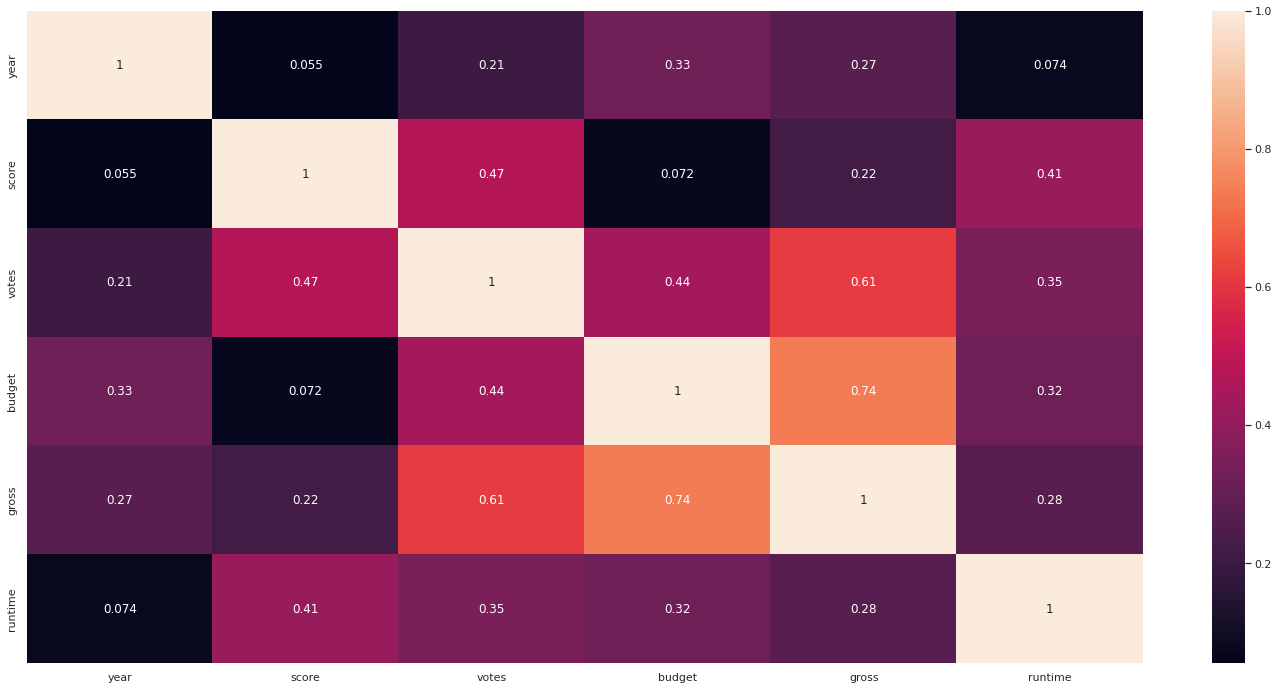

In [ ]:
#correlation plot between numerical attributes

correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True )

The gross revenue and the budget are positively correlated 

The votes and gross revenue are positively correlated

The gross and year are positively correlated

## Recommendations

We recommend streaming services invest heavily on  Action and Comedy Films since they had a high gross revenue to profit ratio.

Streaming services should partner with these production companies i.e. Warner Bros, Universal Studios, Columbia Pictures and 20th Century Fox

We recommend working with Steven Spielberg and Aaron Sorkin since he grossed a high revenue to profit ratio through their Action and Comedy films respectively

The highest performing writers were Christopher Markus James Cameron.

The Actors that had the highest number of eyeballs looking ahead for their films are Robert Downey Junior, Tom Hanks and Tom Cruise since they grossed the highest in the Box Office
